Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

**Descripción de las columnas**

- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [14]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-12-31 00:00:00

#### Variables Cuantitativas: medidas de resumen

In [15]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74549.000000        66668.00000            71504.000000   
mean              2.823686            2.01380              111.120259   
std               1.426992            1.13313             1050.088288   
min               1.000000            1.00000               10.000000   
quartile 1        2.000000            1.00000               45.000000   
median            3.000000            2.00000               65.000000   
quartile 3        4.000000            3.00000              105.000000   
max              40.000000           70.00000           137000.000000   
mode              3.000000            1.00000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72721.000000  72413.000000  72413.000000   
mean                       87.784656    -34.591743    -58.450373   
std                      1034.958908      0.187765      0.300816   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.616031    -58.466399   
median                     58.000000    -34.595818    -58.438877   
quartile 3                 88.000000    -34.577472    -58.408870   
max                    217000.000000    -24.219827    -55.496357   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.268516e+05  
std           3.244602e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.430000e+05  
quartile 3    2.370000e+05  
max           2.140000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [16]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

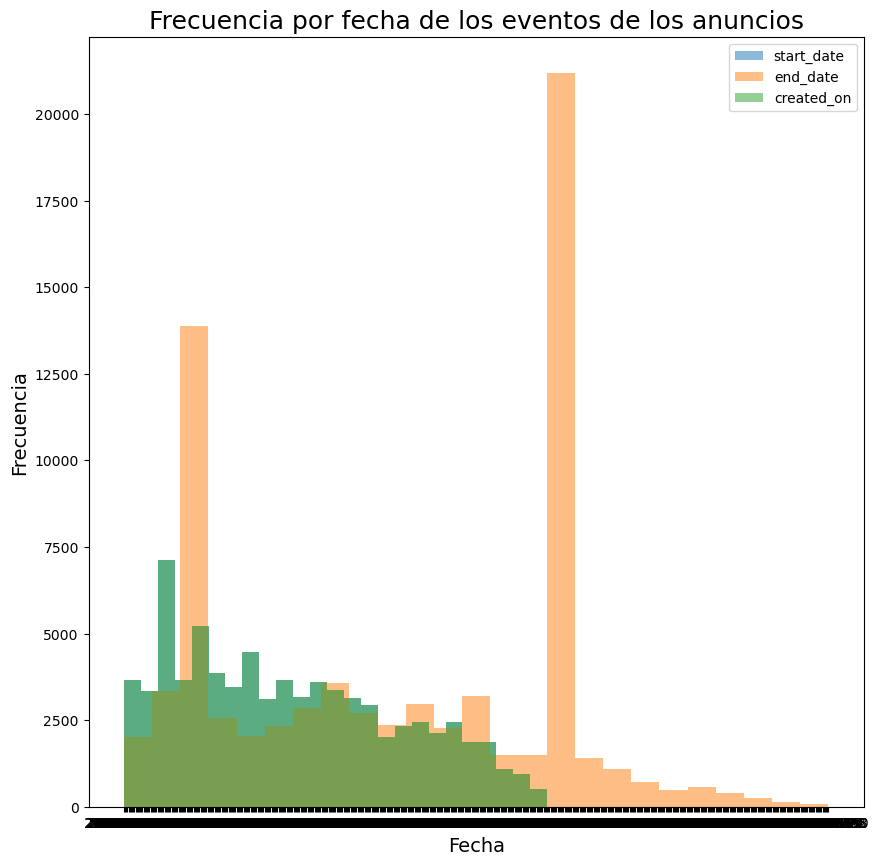

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [18]:
top25 = ds_train['place_l3'].value_counts().head(25)

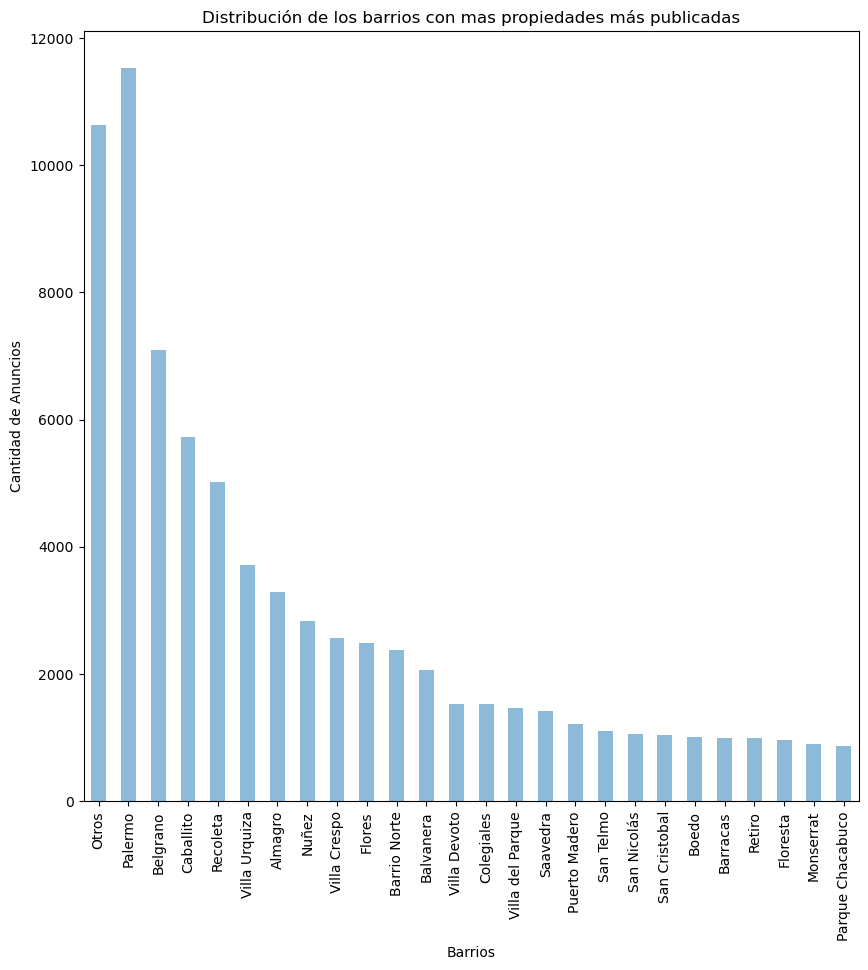

In [19]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

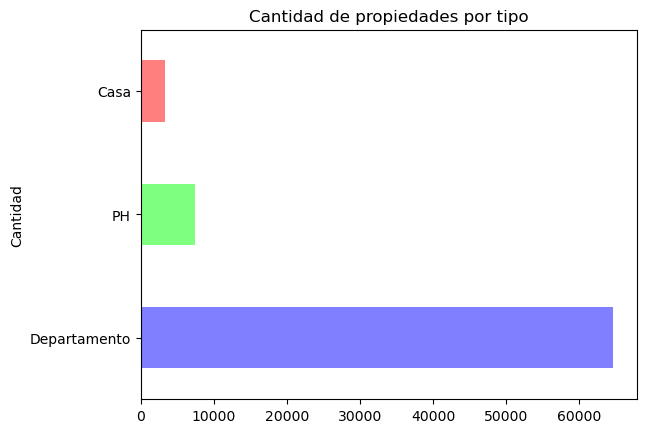

In [20]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

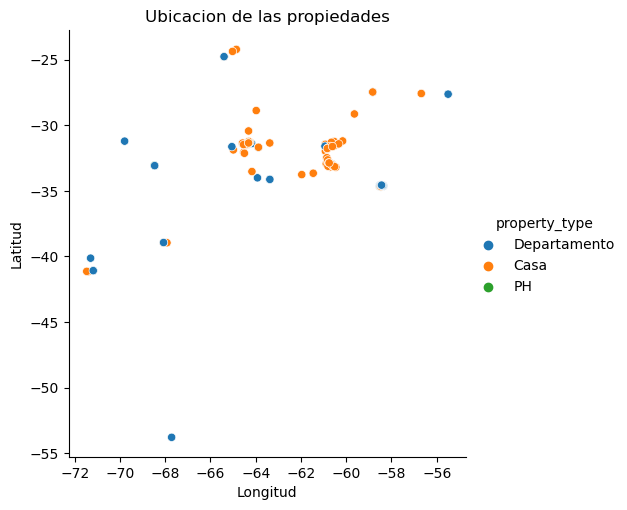

In [21]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

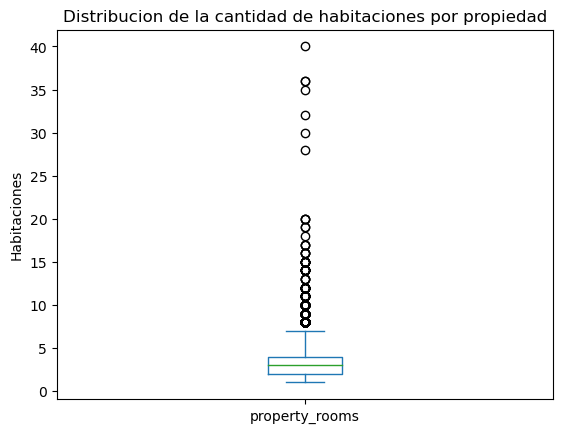

In [22]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

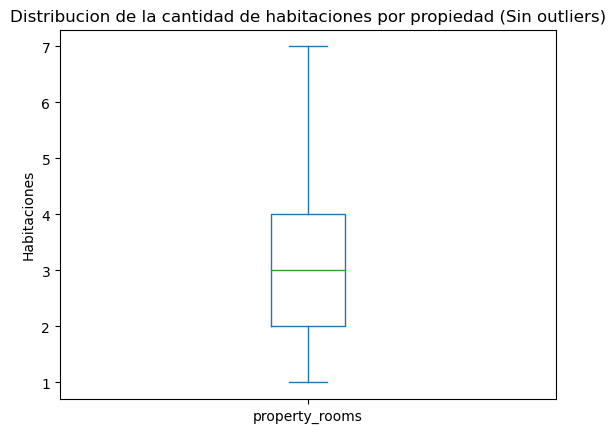

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot:title={'center':'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

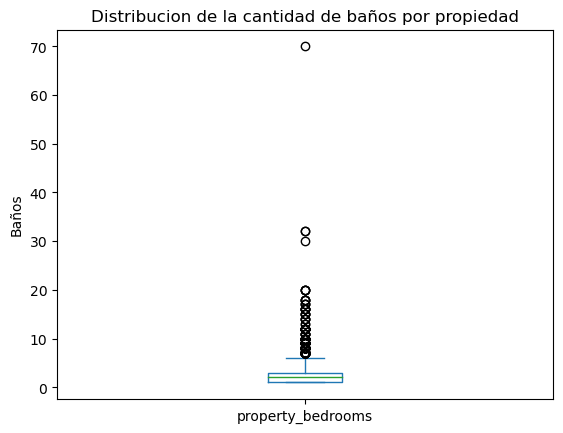

In [24]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


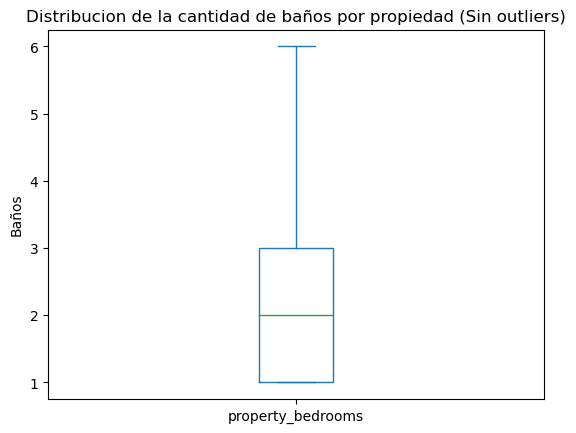

In [25]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [26]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143000.0


<AxesSubplot:title={'center':'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

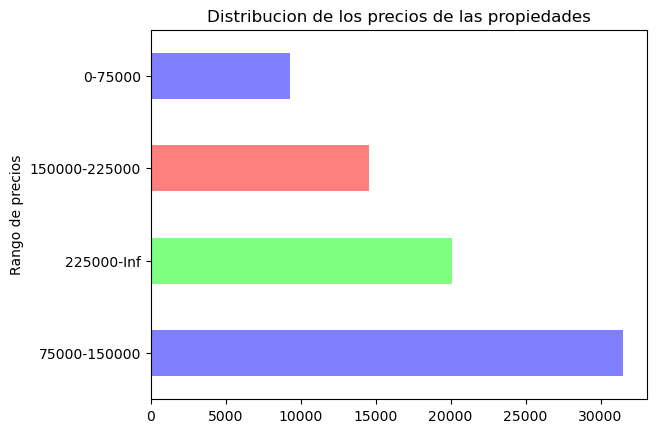

In [27]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot:>

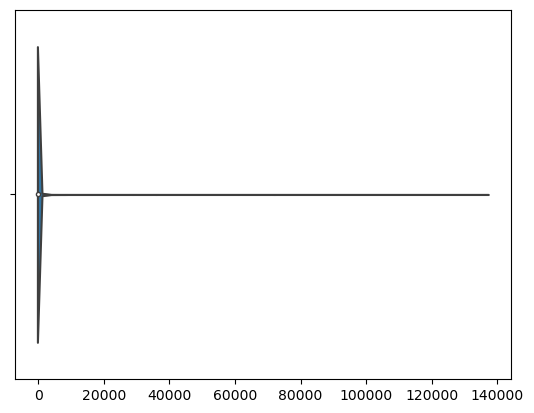

In [28]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot:>

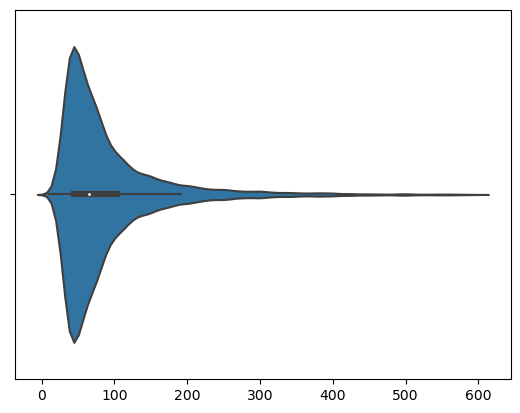

In [29]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot:>

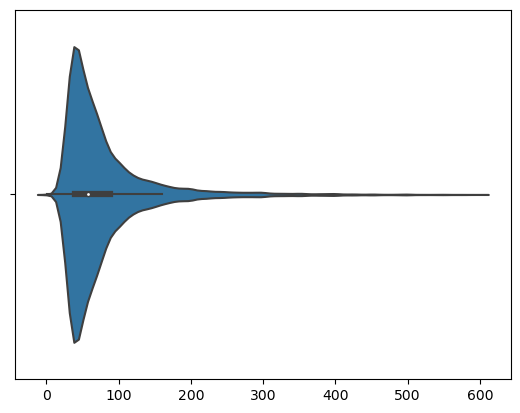

In [30]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

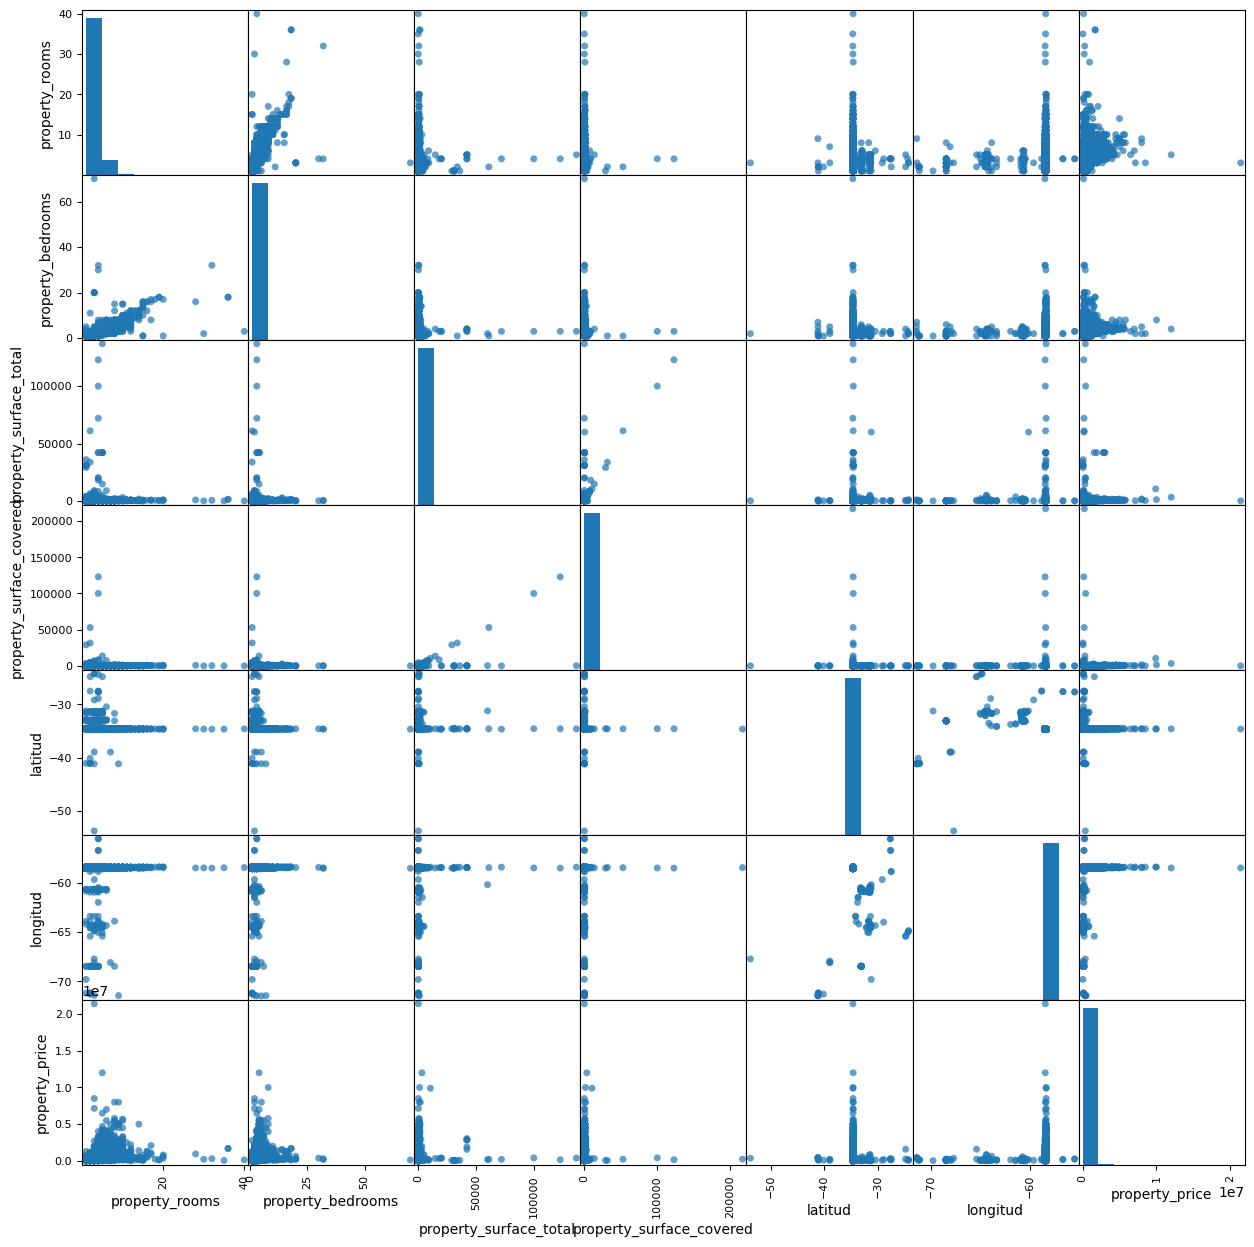

In [31]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [32]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.870641   
property_bedrooms               0.870641           1.000000   
property_surface_total          0.064929           0.066988   
property_surface_covered        0.080232           0.074395   
latitud                         0.005821           0.003733   
longitud                       -0.010384          -0.011347   
property_price                  0.485068           0.423968   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.064929                  0.080232   
property_bedrooms                       0.066988                  0.074395   
property_surface_total                  1.000000                  0.639511   
property_surface_covered                0.639511                  1.000000   
latitud                                 0.026851                  0.002307   
longitud                               -0.015595                 -0.001514   
property_price                          0.083118                  0.055285   

                           latitud  longitud  property_price  
property_rooms            0.005821 -0.010384        0.485068  
property_bedrooms         0.003733 -0.011347        0.423968  
property_surface_total    0.026851 -0.015595        0.083118  
property_surface_covered  0.002307 -0.001514        0.055285  
latitud                   1.000000 -0.193126        0.016400  
longitud                 -0.193126  1.000000        0.022016  
property_price            0.016400  0.022016        1.000000

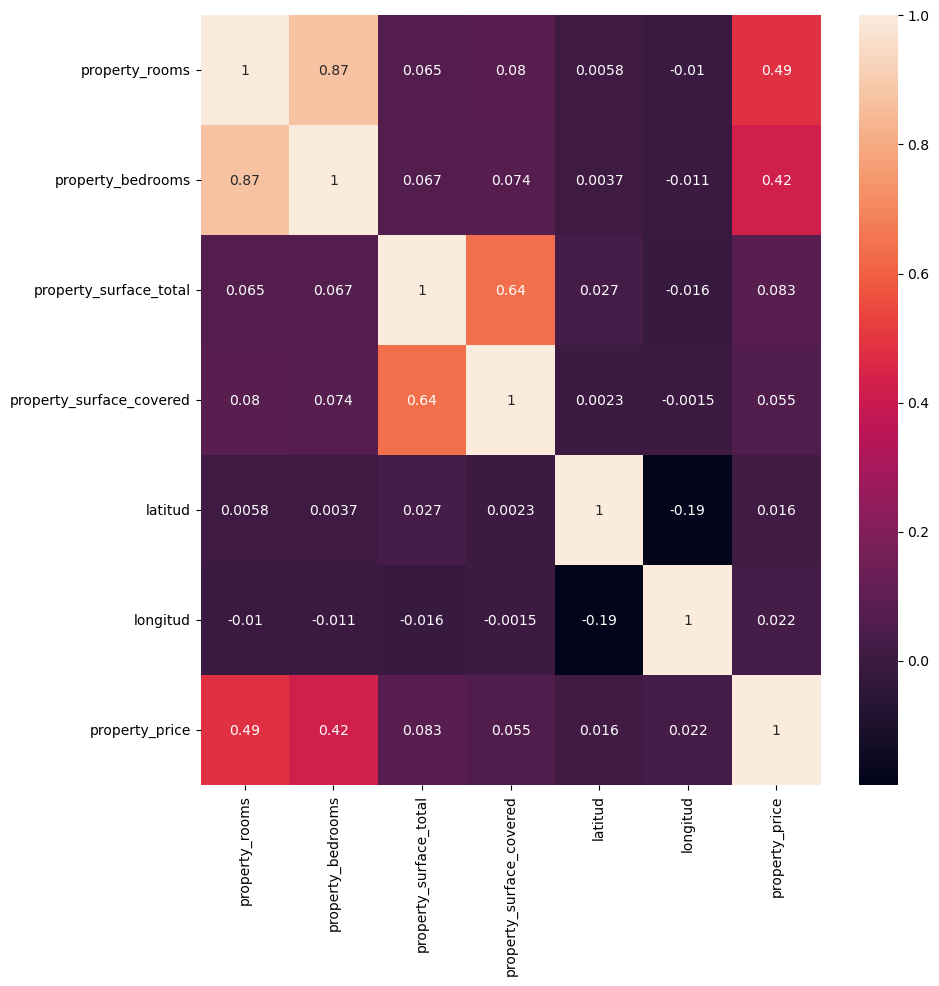

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [34]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.87
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.49
Entre property_surface_total y property_surface_covered:0.64
Entre longitud y latitud:-0.19


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.960265
longitud                      3.960265
place_l2                      0.000000
place_l3                      0.446956
place_l4                     96.120638
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.127336
property_bedrooms            11.579729
property_surface_total        5.165851
property_surface_covered      3.551771
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


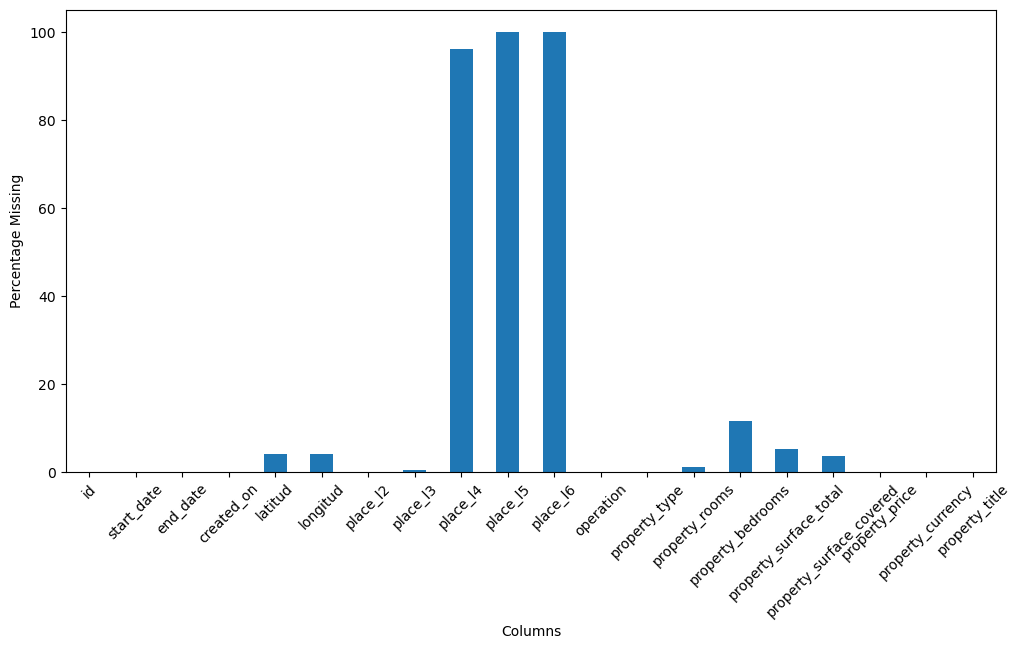

In [35]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot:>

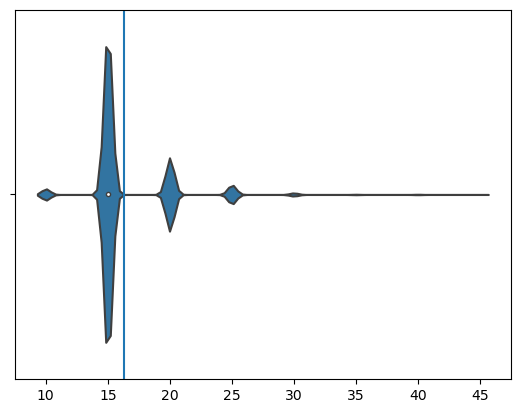

In [36]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [37]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.960265
longitud                      3.960265
place_l2                      0.000000
place_l3                      0.446956
place_l4                     96.120638
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.127336
property_bedrooms            11.579729
property_surface_total        5.165851
property_surface_covered      3.551771
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


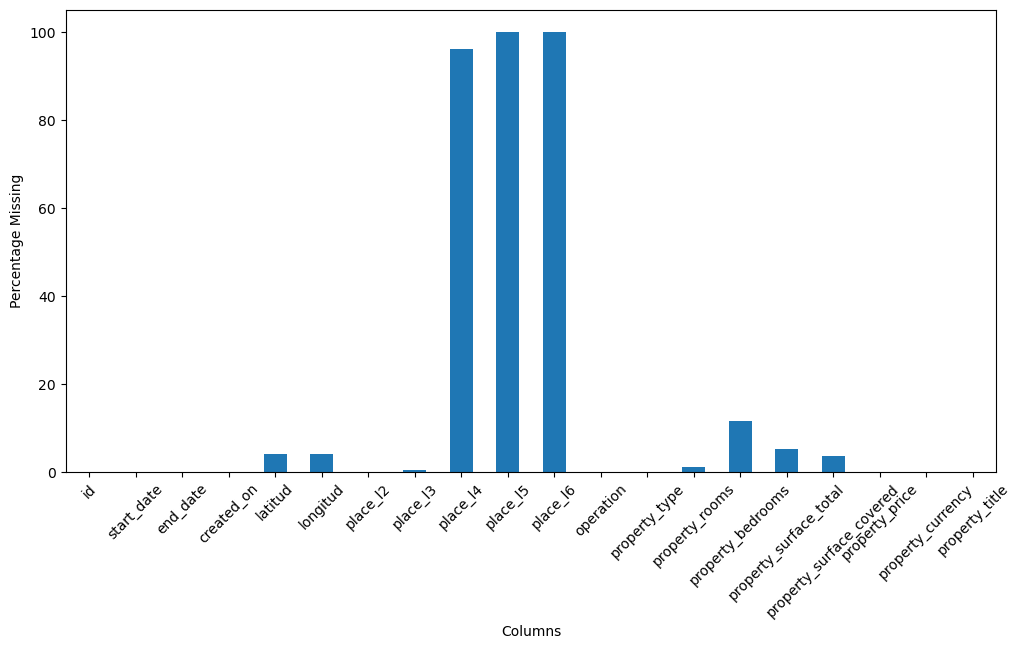

In [38]:
plot_missing_by_column(ds_train)

In [39]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    3.960265
dtype: float64


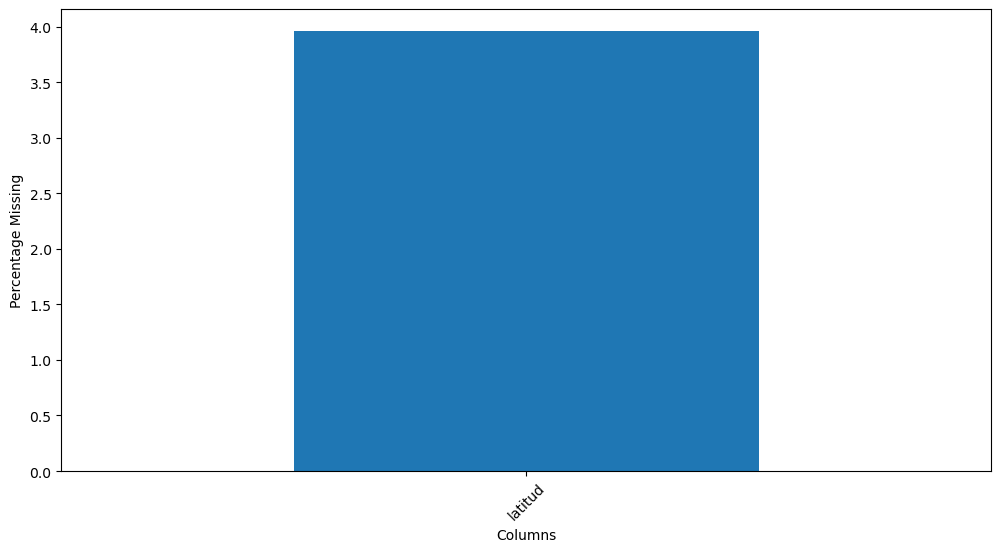

In [40]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.960265
dtype: float64


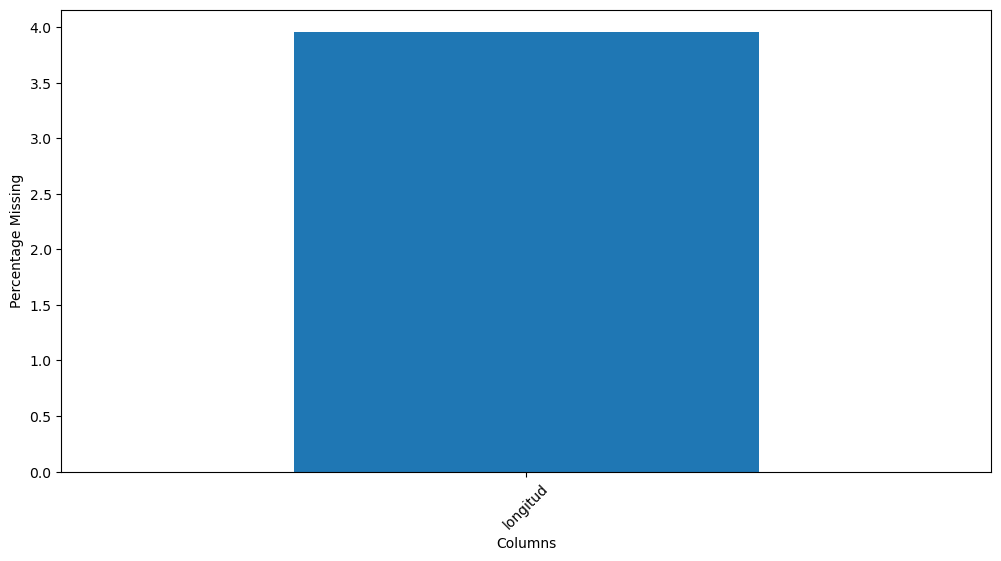

In [41]:
plot_missing_by_column(ds_train[['longitud']])

In [42]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [43]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [44]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.588%
Los datos faltantes en la columna place_l3 para test representan el 4.435%


In [45]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [46]:
ds_train[ds_train.latitud.isna()]

id  start_date    end_date  latitud  longitud  \
151716  +qSJjZYy7p+mobIddB6WNA==  2021-08-05  2021-11-04      NaN       NaN   
318737  /GQgeYB366orgPmlswOlew==  2021-03-17  2021-11-04      NaN       NaN   
47980   SN9IPUb1lO6rVU9Q6jHRXA==  2021-03-14  2021-05-19      NaN       NaN   
346564  aJ+TIfF6ee30ip5+ik0Upw==  2021-09-30  2021-10-02      NaN       NaN   
119175  iBAE80MSUHIX96PwAFleUA==  2021-03-25  2021-11-04      NaN       NaN   
...                          ...         ...         ...      ...       ...   
458690  uzOE5TSle78c4dgqiJ8hYg==  2021-01-05  2021-03-01      NaN       NaN   
318766  2R+1KBzugiC44t5m4HH8Zg==  2021-03-17  2021-05-19      NaN       NaN   
389690  BNsc9j62YZWgIQAaQ3vR7w==  2021-05-05  2021-06-05      NaN       NaN   
299216  3YXrUTUsKAzutpSbOuezfg==  2021-01-18  2021-01-29      NaN       NaN   
318282  OR5WhCzgKUhaDY9kcPPKug==  2021-03-17  2021-03-31      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
151716      NaN  Departamento             2.0                NaN   
318737      NaN  Departamento             1.0                NaN   
47980       NaN  Departamento             2.0                1.0   
346564      NaN          Casa             4.0                3.0   
119175      NaN  Departamento             1.0                NaN   
...         ...           ...             ...                ...   
458690      NaN          Casa             NaN                2.0   
318766      NaN  Departamento             1.0                NaN   
389690      NaN  Departamento             3.0                3.0   
299216      NaN            PH             3.0                2.0   
318282      NaN          Casa             4.0                NaN   

        property_surface_total  property_surface_covered  property_price  \
151716                     NaN                      48.0         89000.0   
318737                     NaN                      39.0         98000.0   
47980                     50.0                      45.0         92999.0   
346564                   986.0                     148.0        155000.0   
119175                     NaN                      23.0         53000.0   
...                        ...                       ...             ...   
458690                     NaN                      80.0        120000.0   
318766                     NaN                      44.0         80000.0   
389690                    56.0                       NaN         97000.0   
299216                   138.0                      78.0        138000.0   
318282                    75.0                     110.0        145000.0   

                                           property_title  
151716  Departamento en Venta Caba / Buenos Aires (B11...  
318737  Departamento en Venta CABA / Buenos Aires (D03...  
47980   DEPARTAMENTO DE 2 AMBIENTES EN VENTA EN PARQUE...  
346564      PROYECTO CASA EN  COSTA ESMERALDA 4 AMBIENTES  
119175  Departamento en Venta CABA / Buenos Aires (D03...  
...                                                   ...  
458690               Casa a reciclar 3 Amb. en San Martin  
318766  Departamento en Venta CABA / Buenos Aires (D03...  
389690  Oficina o vivienda. Todo luz! A pasos del Obel...  
299216                              PH - Villa Gral.Mitre  
318282     Casa  en Venta CABA / Buenos Aires (D038 1532)  

[137 rows x 13 columns]

In [47]:
ds_test[ds_test.latitud.isna()]

id  start_date    end_date  latitud  longitud  \
336734  AhGnqYUCnKE+F8ggXKB29Q==  2021-04-13  2021-06-17      NaN       NaN   
84681   FDP0I8rP+WzTtwUj4Gc2iQ==  2021-03-26  2021-04-13      NaN       NaN   
151051  NWbXB0gPxuUNRgXVhs8sKw==  2021-08-05  2021-11-04      NaN       NaN   
223275  pcuhUjbSIqjPTsytR6Kqew==  2021-09-14  2021-11-04      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==  2021-11-30  9999-12-31      NaN       NaN   
134800  523CC8zAk8rc05AJBl1IaA==  2021-04-06  2021-11-04      NaN       NaN   
348199  9L8mNJdhzxb5vH8bNIKPoQ==  2021-04-16  2021-04-22      NaN       NaN   
84629   /DLePVDOMNQTbVzG8YVjTA==  2021-03-26  2021-06-02      NaN       NaN   
324195  yZbN/7naQCAKZfRIbH9lqw==  2021-03-03  2021-11-04      NaN       NaN   
448210  DvLI8uRl2AL9kVavsIxkJQ==  2021-12-16  2022-03-25      NaN       NaN   
296346  i+lEVAlk2+Dsmc63c2DYUw==  2021-04-26  2021-06-05      NaN       NaN   
32679   l6NUlcdSPVsmmKdQIMzWrw==  2021-02-08  9999-12-31      NaN       NaN   
174963  vgbuVMz0jlwMTJyFqSnhUw==  2021-08-31  2021-09-03      NaN       NaN   
299218  fw4diWnaGhEwDMifRRH3fw==  2021-01-18  2021-01-29      NaN       NaN   
63593   MDq7beRRDhnnexPlizndeg==  2021-06-22  2021-11-20      NaN       NaN   
286186  4vouwXxdR9jsE/8VHrbQsQ==  2021-06-16  2021-10-26      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg==  2021-04-21  2021-06-05      NaN       NaN   
143123  m281LUJMceK6Z3pN9+h3cg==  2021-06-08  2021-11-04      NaN       NaN   
378461  PZA/i+ktmeRpM25oDPqW5Q==  2021-05-19  2021-11-04      NaN       NaN   
173649  +SQUH85tiajEW7WKMsBjZQ==  2021-05-11  2021-11-04      NaN       NaN   
421130  ShOanYvqbyXRLC3X6twa/g==  2021-07-07  2021-10-17      NaN       NaN   
163810  hhXFb7aU9UN5WLlJvrwnDA==  2021-06-07  2021-10-14      NaN       NaN   
143139  o3M27wZP0wjwslbl+UWlcA==  2021-06-08  2021-11-04      NaN       NaN   
7204    U65AD6YXmo1PjgUmHGMtag==  2021-02-09  2022-07-17      NaN       NaN   
445804  BZF7xcpA0wDZYDkuTkn/kA==  2021-01-14  2021-11-04      NaN       NaN   
448188  O+BxvGy0FaQeVbN9TO9xhg==  2021-12-16  2022-02-09      NaN       NaN   
459195  E8hNlBjeRdD9Cr759qVghQ==  2021-01-05  2021-03-01      NaN       NaN   
223287  ANBlWDLQarFIoRKCdED4SQ==  2021-09-14  2021-11-04      NaN       NaN   
308980  yHH+c/hrvj+80CmVIyH+iw==  2021-09-01  2022-03-09      NaN       NaN   
106696  iV7+4ns6JXgPJSEj0D9ezg==  2021-03-11  2021-03-25      NaN       NaN   
69056   bYR88SCJgxobwY62vy40KQ==  2021-09-23  2022-02-02      NaN       NaN   
286975  TO9zmGEevDqKAwW4/Ear4w==  2021-06-16  2021-11-04      NaN       NaN   
97663   HUUW8qvm+2F/1vreTVjp8Q==  2021-11-25  2022-01-27      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
336734      NaN  Departamento             4.0                NaN   
84681       NaN  Departamento             3.0                2.0   
151051      NaN          Casa             4.0                NaN   
223275      NaN          Casa             5.0                NaN   
218048      NaN          Casa             NaN                2.0   
134800      NaN  Departamento             1.0                NaN   
348199      NaN          Casa             NaN                4.0   
84629       NaN  Departamento             2.0                1.0   
324195      NaN  Departamento             3.0                NaN   
448210      NaN          Casa             6.0                5.0   
296346      NaN            PH             3.0                2.0   
32679       NaN          Casa             NaN                2.0   
174963      NaN          Casa             4.0                3.0   
299218      NaN            PH             3.0                2.0   
63593       NaN  Departamento             1.0                NaN   
286186      NaN            PH             3.0                NaN   
45963       NaN  Departamento             1.0                NaN   
143123      NaN  Departamento             2.0                NaN   
378461      NaN            PH             4.0      

In [48]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0018%


In [49]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


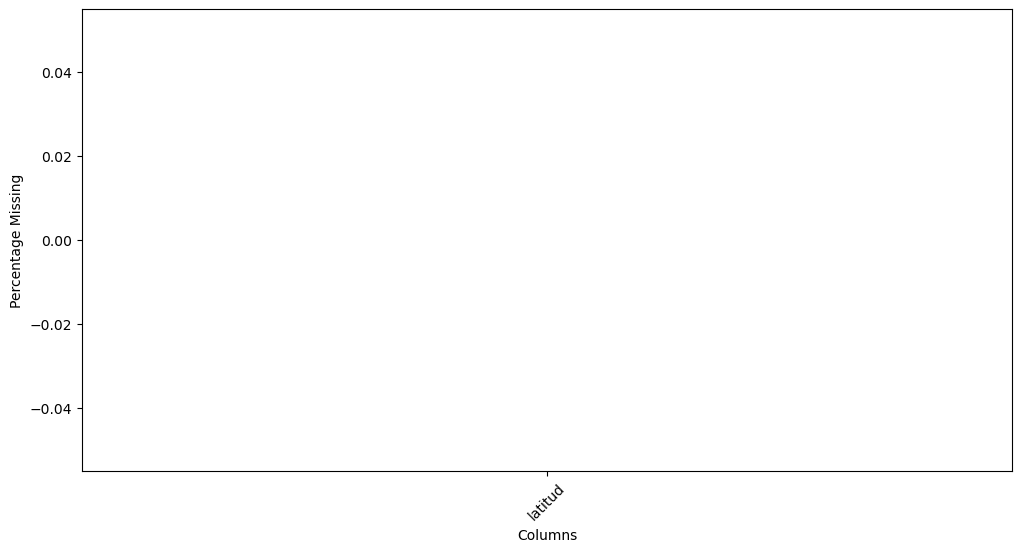

In [50]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


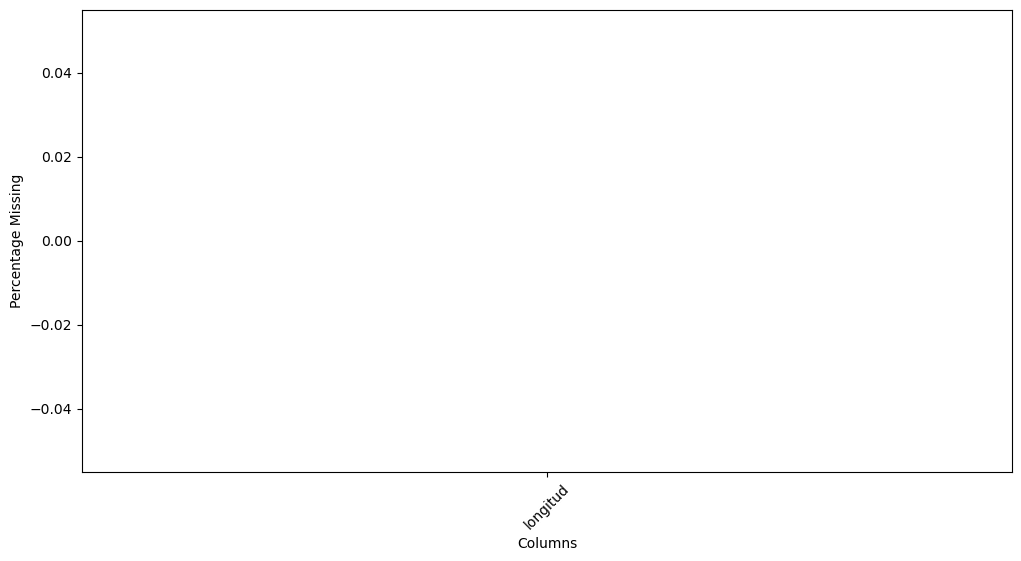

In [51]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.096171
dtype: float64


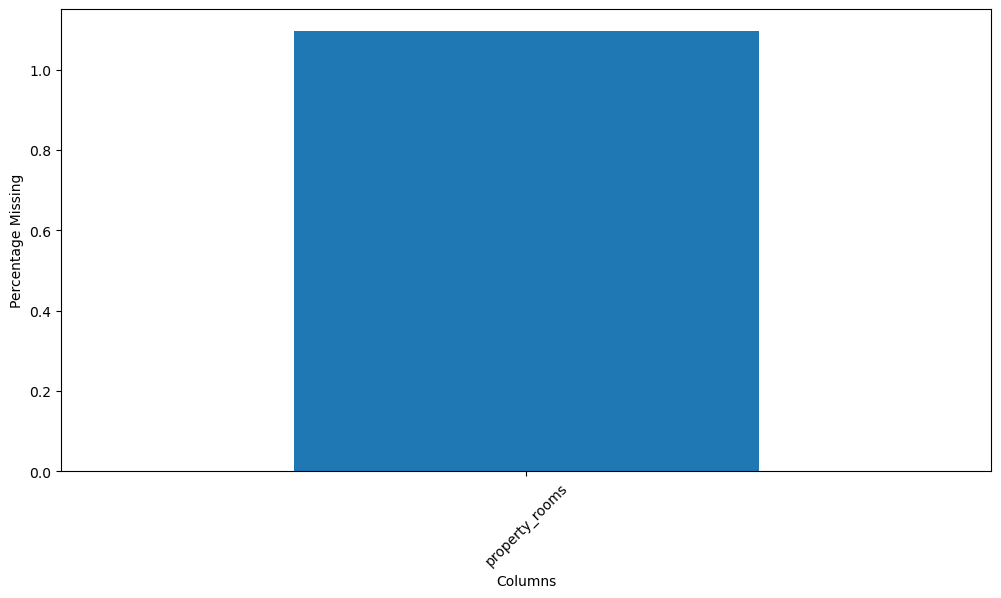

In [52]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [53]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [54]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 825
cantidad de ambientes faltantes post reparacion: 648
cantidad inicial de ambientes a reparar: 189
cantidad de ambientes faltantes post reparacion: 182


**Post Imputacion de ambientes**

property_rooms    0.860992
dtype: float64


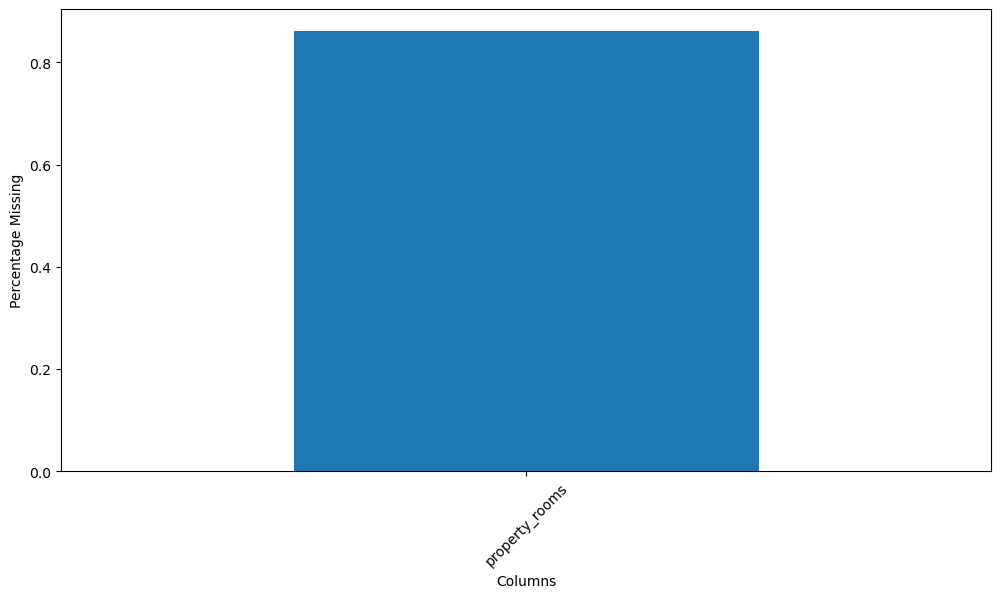

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

In [56]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


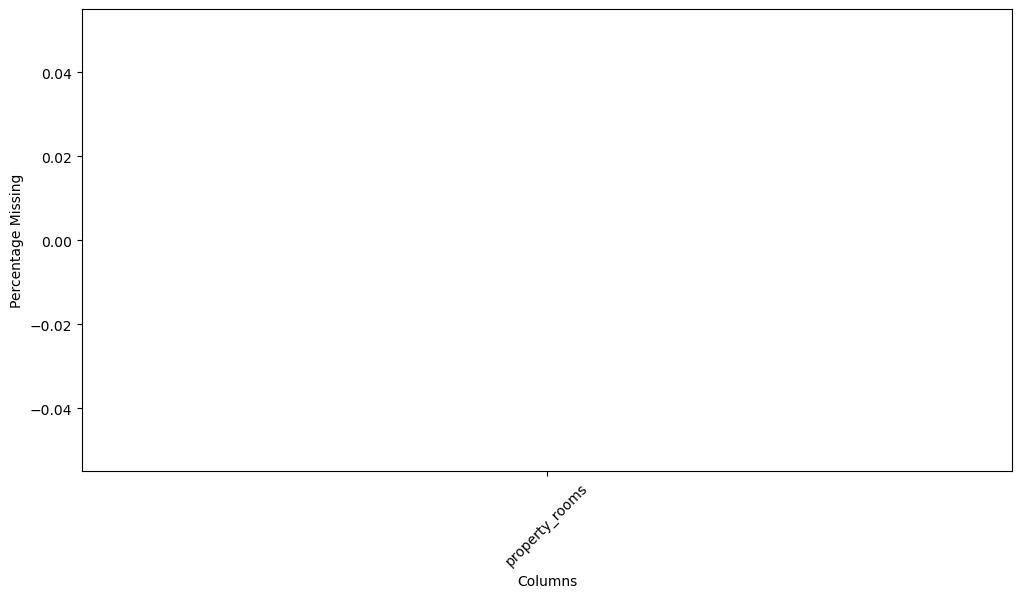

In [57]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.224435
dtype: float64


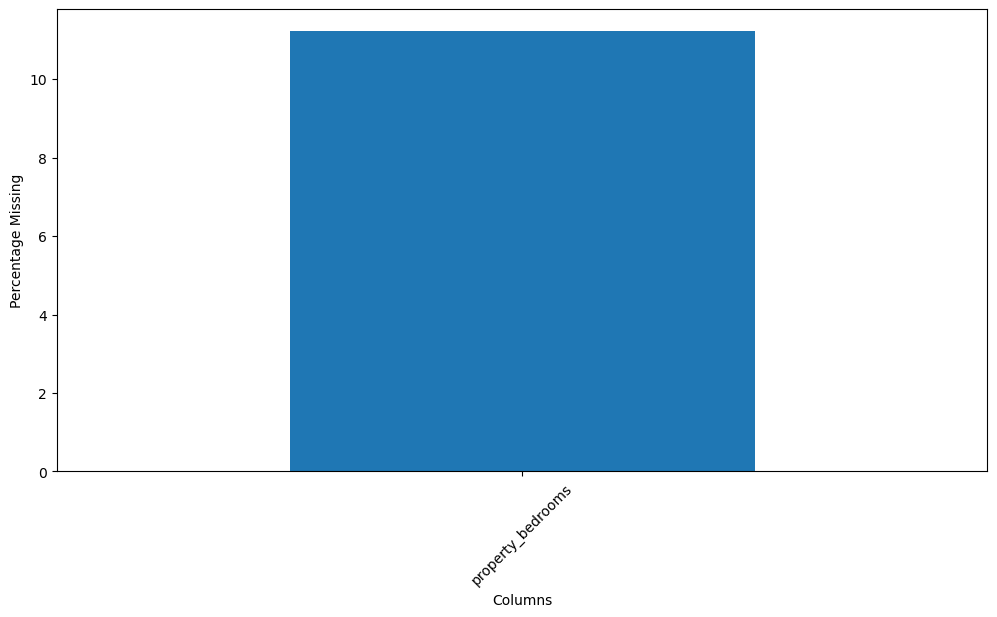

In [58]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [59]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74614
El total de habitaciones invalidas es: 126. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18635
El total de habitaciones invalidas es: 36. Constituye al 0% de los datos del ds


id  start_date    end_date    latitud  \
115487  Bgj611hVzVOnofZ0eY0unA==  2021-12-07  2022-01-27 -34.613037   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 -34.650156   
150144  OwNpobSoNV+5PZJqdx/A0Q==  2021-03-24  2021-06-02 -34.605254   
404398  2h+d0j/474llaBCMxsopeA==  2021-08-13  2022-02-09 -34.632353   
115502  tNDmYqYiETKsquAIP857XA==  2021-12-07  2022-01-27 -34.613261   
336275  3SWFBziGzgsAiLOjdK3MVw==  2021-07-21  2021-07-31 -34.595668   
451218  7krE2YAxkwyebVtlLkuFcA==  2021-12-16  2022-01-27 -34.557917   
100370  zUsUsmAutDkdz1cIuJ9ANg==  2021-04-07  2021-08-26 -34.608162   
29406   OOz88YCCX3+F85n3z/yoiQ==  2021-10-15  2022-03-25 -34.573955   
337594  XUbPo5tS8nJVb7+Ex+KwQg==  2021-04-13  2021-06-05 -34.562450   
123725  h0fOMIAlpk6v/IWJFmjTLg==  2021-08-04  2022-02-09 -34.607034   
337805  U+eSSM88Ljzr3NMDIv1Pfg==  2021-04-13  2021-08-26 -34.608162   
115491  u5hOV+bJihRU3VAVxsfsrw==  2021-12-07  2022-01-27 -34.613037   
432011  s14IJlvWuE+oZmMurxiGpw==  2021-12-16  2022-02-09 -34.643086   
171569  zKrvUbrB7p50rDDxMp2yrw==  2021-04-19  2021-06-05 -34.617993   
97734   +0qsKtd+p5A+2Et160DASw==  2021-11-25  2022-01-27 -34.598309   
399560  qlMqnmUjGt7quE+h6uWNng==  2021-02-13  2021-05-31 -34.601997   
115484  C77X+Liz8eeC3QnMVIbx5A==  2021-12-07  2022-01-27 -34.613261   
306146  TomuEJJHnscu02wJs8c9VA==  2021-03-04  2021-03-10 -34.581793   
258718  k8B5YFFJR/qAum7Vo/NTlg==  2021-11-03  2022-01-27 -34.603809   
371576  IXM/gb1ZLCR3m0DK/VczrQ==  2021-04-24  2021-07-19 -34.604930   
314524  zQLIDasZzzC/Mrns3r4TLw==  2021-01-06  2021-03-15 -34.567787   
116648  rc5FbdGZKitxmRAK7ssCJA==  2021-08-18  2021-08-19 -34.647511   
49960   O/JMW/VVo7OmWF7SkXtBuA==  2021-10-16  2021-12-24 -34.630186   
236627  b9EozGaH7soWmVYUSfOs+A==  2021-01-20  2021-02-18 -34.626670   
27849   indoHQClfn3r0gDuKdqgLQ==  2021-12-03  2022-01-27 -34.592121   
259812  Sn6QBrocsb7ut8BM67cJkw==  2021-11-05  2022-01-27 -34.598445   
385580  48pQafgstnUSZLKK3E9u7A==  2021-02-10  9999-12-31 -34.562450   
4928    69j280NshNyMCYcFqsmhlw==  2021-09-20  2022-01-27 -34.645031   
115472  8GnXLYvT917uZZQOseeXXw==  2021-12-07  2022-01-27 -34.613037   
130394  oGubrAcyAHXx5ilYS91Euw==  2021-05-27  2021-09-20 -34.643439   
422322  +vPPcdUiRAfJw/r3pJhEDQ==  2021-07-07  9999-12-31 -34.629807   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 -34.588454   
393372  7nxreTyKxab7bspnoAodSQ==  2021-02-13  2021-03-01 -34.612133   
188564  qy6IBMdRGJeeJDIOgE8u2Q==  2021-04-03  2021-04-27 -34.625245   
236624  wNjDuMJwjrMgsHHpZdNidA==  2021-01-20  2021-02-18 -34.626670   

         longitud           place_l3 property_type  property_rooms  \
115487 -58.360984      Puerto Madero  Departamento             3.0   
387679 -58.473353  Parque Avellaneda          Casa             5.0   
150144 -58.468938           Paternal          Casa             3.0   
404398 -58.470828             Flores  Departamento             3.0   
115502 -58.361513      Puerto Madero  Departamento             3.0   
336275 -58.389490           Recoleta  Departamento             4.0   
451218 -58.459907           Belgrano  Departamento             1.0   
100370 -58.453786          Caballito          Casa             5.0   
29406  -58.469930           Belgrano          Casa             4.0   
337594 -58.454040           Belgrano  Departamento             3.0   
123725 -58.382298        San Nicolás  Departamento             4.0   
337805 -58.453786          Caballito          Casa             5.0   
115491 -58.360984      Puerto Madero  Departamento             3.0   
432011 -58.435170   Parque Chacabuco            PH             3.0   
171569 -58.361880      Puerto Madero  Departamento             4.0   
97734  -58.379852             Retiro  Departamento             1.0   
399560 -58.383625        San Nicolás  Departamento             4.0   
115484 -58.361513      Puerto Madero  Departamento             3.0   
306146 -58.424667            Palermo  Departamento             3.0   
25

In [60]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55828. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13867. Constituyen al 74% de los datos


In [61]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8375
Valor inicial de habitaciones faltantes en el ds de test: 2154


In [62]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [63]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


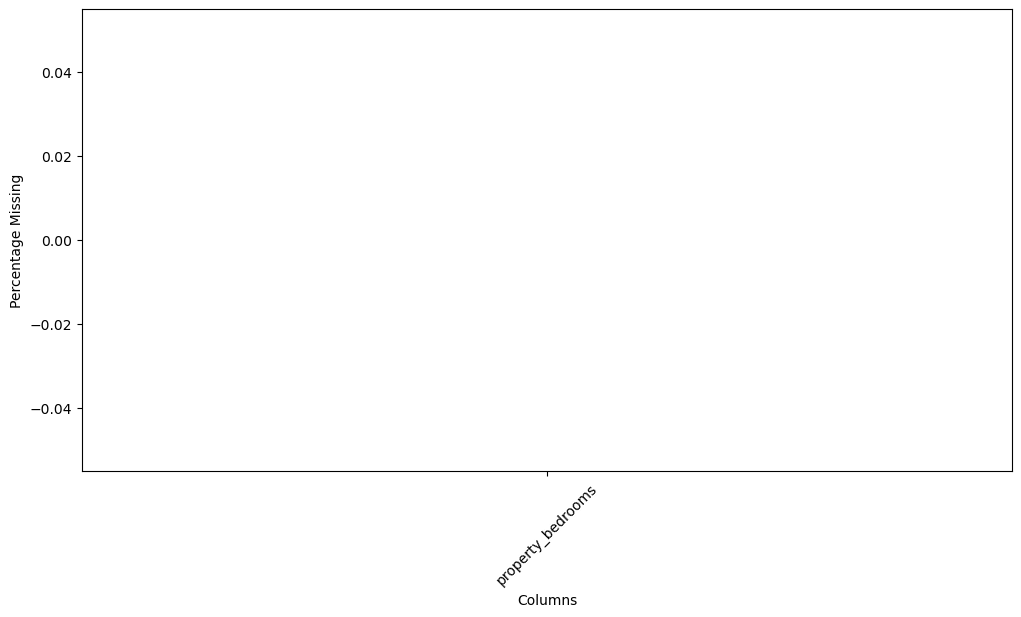

In [64]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.945453
dtype: float64


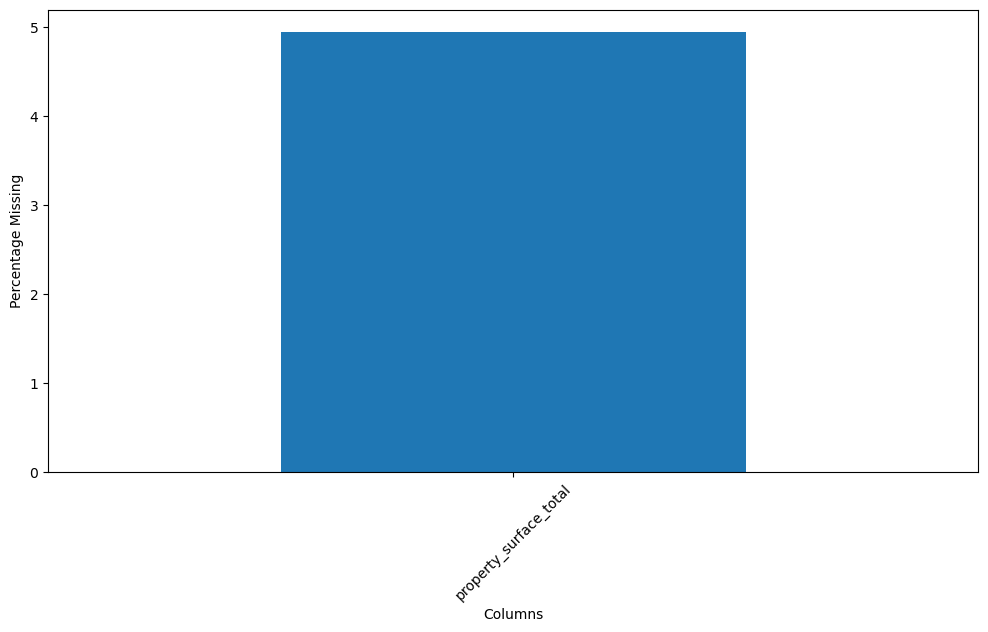

In [65]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [66]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [67]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


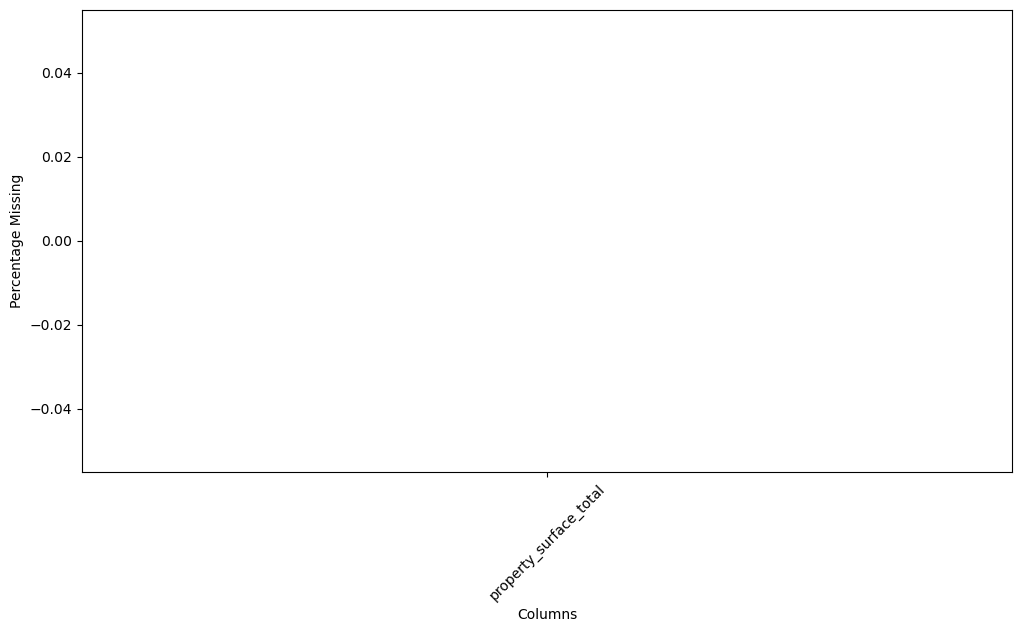

In [68]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()]

id  start_date    end_date    latitud  \
259023  Qgy7pmJ4NulNrdbxa8a7MQ==  2021-12-13  2021-12-23 -34.555436   
378548  qLFh3csCMe8QE/d8YuEB+A==  2021-05-19  2021-06-05 -34.648351   
303940  HEfvoNY3/IS+FFy1ApwcyQ==  2021-04-15  2021-06-05 -34.609206   
340124  1WEyn0eXhz+NGwZIilaykg==  2021-06-01  2021-06-05 -34.621146   
283186  MWQ+hJC03UkE3bGKA72gwA==  2021-09-16  2021-10-07 -34.608246   
...                          ...         ...         ...        ...   
108518  mOu1nzlztBq39u5NCXWgFg==  2021-07-16  2021-11-27 -34.580061   
150720  An4P08gKFeWaW+13dO4jAw==  2021-03-24  2021-06-05 -34.619067   
39862   iHVJb3RDIgynEO/uwN7Ccw==  2021-07-30  9999-12-31 -34.618153   
25784   83wAjgkxIGHOkwlcviuMMQ==  2021-06-24  2022-03-17 -34.579138   
65034   lboj/RZWnuIGOZzt+eoI9A==  2021-05-15  2021-06-05 -34.661068   

         longitud           place_l3 property_type  property_rooms  \
259023 -58.475303              Nuñez  Departamento             3.0   
378548 -58.480914  Parque Avellaneda            PH             3.0   
303940 -58.426120            Almagro  Departamento             2.0   
340124 -58.361192      Puerto Madero  Departamento             3.0   
283186 -58.363794      Puerto Madero  Departamento             2.0   
...           ...                ...           ...             ...   
108518 -58.439527            Palermo  Departamento             2.0   
150720 -58.434604          Caballito  Departamento             4.0   
39862  -58.362615      Puerto Madero  Departamento             3.0   
25784  -58.440758            Palermo  Departamento             1.0   
65034  -58.473842  Parque Avellaneda          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
259023                2.0                    83.0                       NaN   
378548                2.0                    95.0                       NaN   
303940                1.0                    41.0                       NaN   
340124                2.0                   120.0                       NaN   
283186                1.0                    67.0                       NaN   
...                   ...                     ...                       ...   
108518                1.0                    49.0                       NaN   
150720                3.0                   144.0                       NaN   
39862                 2.0                   152.0                       NaN   
25784                 1.0                    42.0                       NaN   
65034                 2.0                   200.0                       NaN   

        property_price                                     property_title  
259023        100000.0                               Departamento - Nuñez  
378548         98000.0                             PH - Parque Avellaneda  
303940        135000.0  Rawson 279 * departamento de 2 ambientes con c...  
340124        550000.0   3 AMBIENTES EN VENTA LINK TOWERS, PUERTO MADERO.  
283186        310000.0  Pto Madero 2 amb  equipado con Cochera Olga Co...  
...                ...                                                ...  
108518        130000.0  En construcción! 2 ambientes próximo a entrega...  
150720        395000.0  CABALLITO, PISO 4 AMB CON DEP BCON VISTA PANOR...  
39862         710000.0  RENOIR I  152Mts2  3AMB DEPEND. COCH. BAULERA-...  
25784         135000.0                             Departamento - Palermo  
65034         148000.0                           Casa - Parque Avellaneda  

[2610 rows x 13 columns]

property_surface_covered    3.498003
dtype: float64


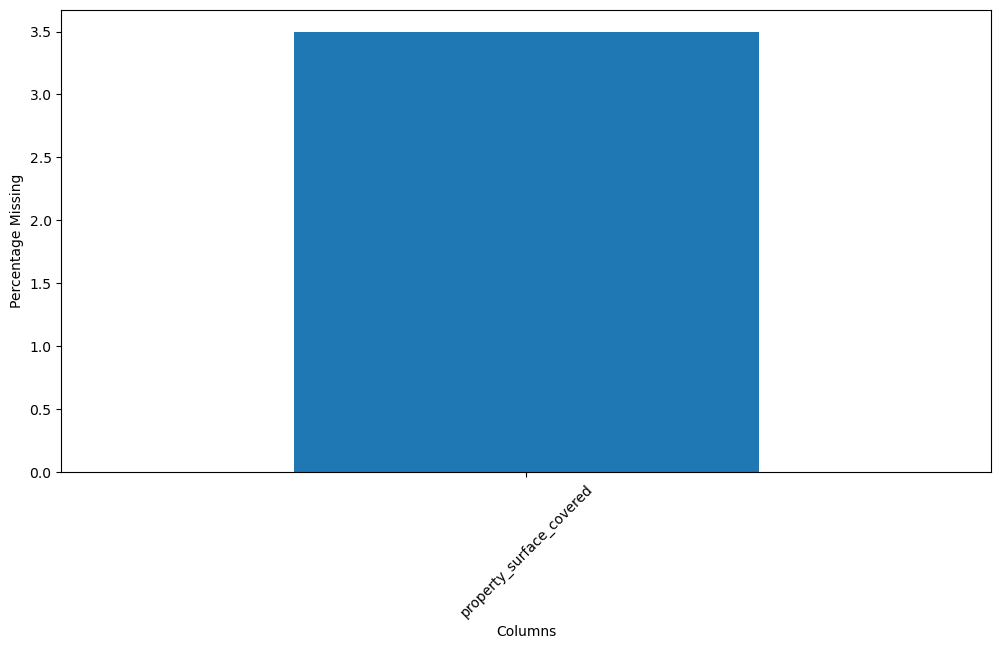

In [70]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [71]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2337
PH               184
Casa              89
Name: property_type, dtype: int64

In [72]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [73]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 273


In [74]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 654


In [75]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.205808
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


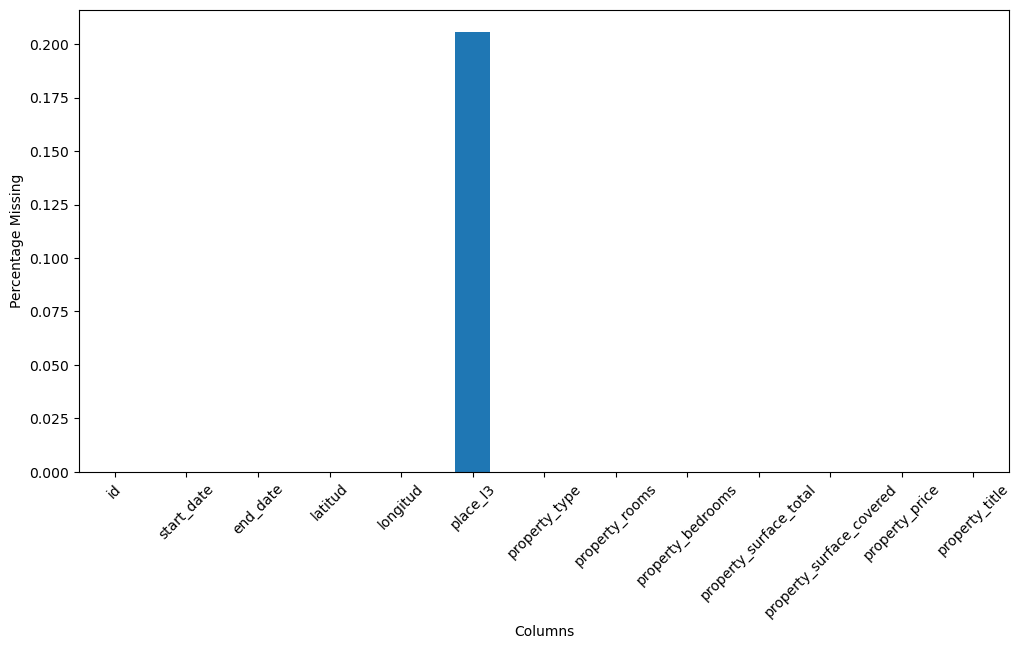

In [76]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [77]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [78]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [79]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74341
outliers encontrados para los property_rooms: 1179
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


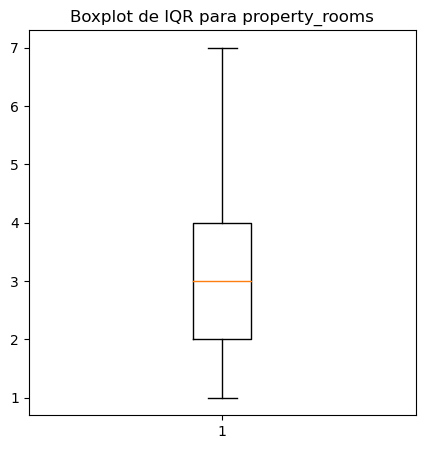

In [80]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [81]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 577. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 151. Constituyen al 0% de los datos


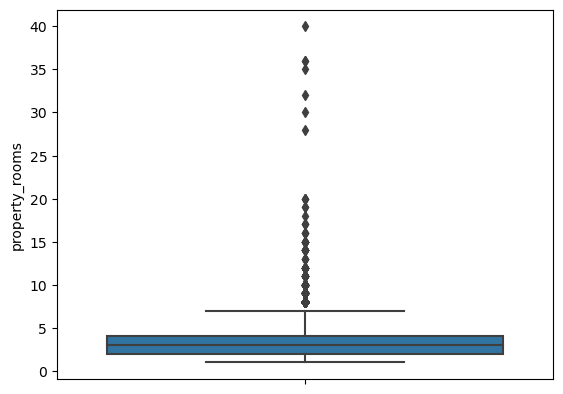

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [83]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


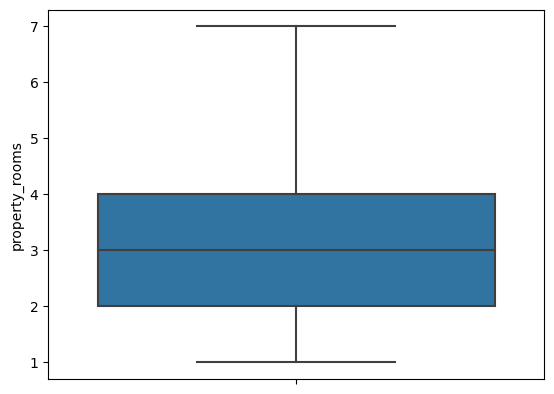

In [84]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


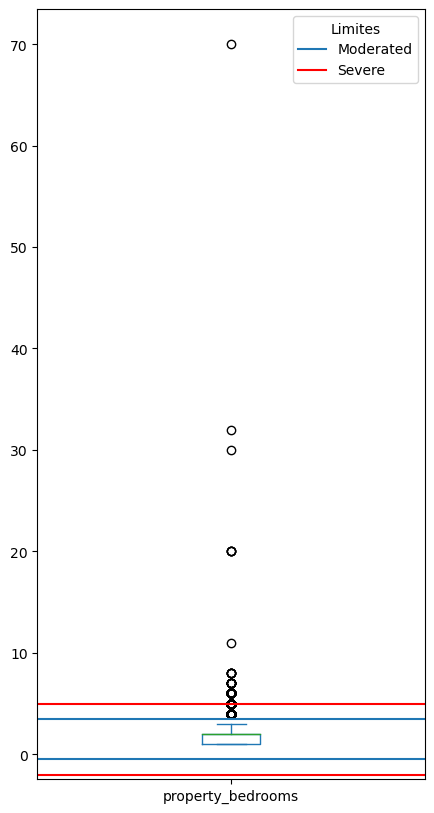

In [85]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73764
outliers encontrados para los property_bedrooms: 4346
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


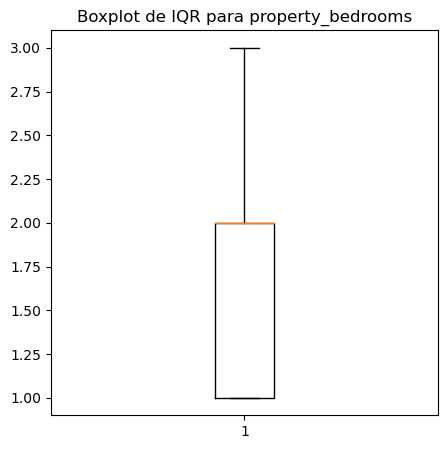

In [86]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [87]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 26. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 8. Constituyen al 0% de los datos


In [88]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en train
filas a eliminar:                               id  start_date    end_date    latitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18 -34.577595   

         longitud       place_l3 property_type  property_rooms  \
406880 -58.495185  Villa Urquiza  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price                                     property_title  
406880        125000.0  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en test


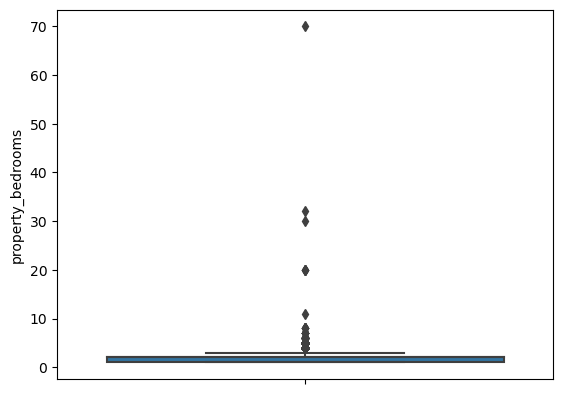

In [89]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [90]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [91]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 26 registros en train
Se han eliminado: 8 registros en test


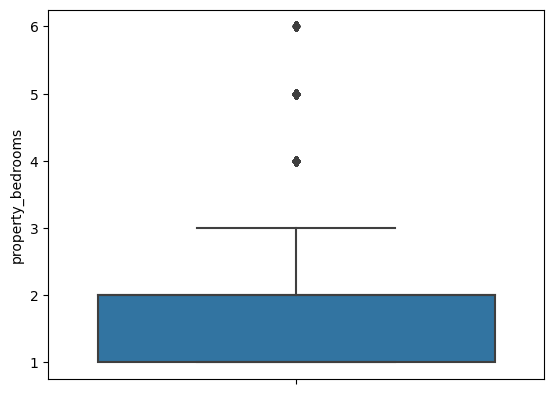

In [92]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73738
outliers encontrados para los property_surface_total: 5939
hay 8% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


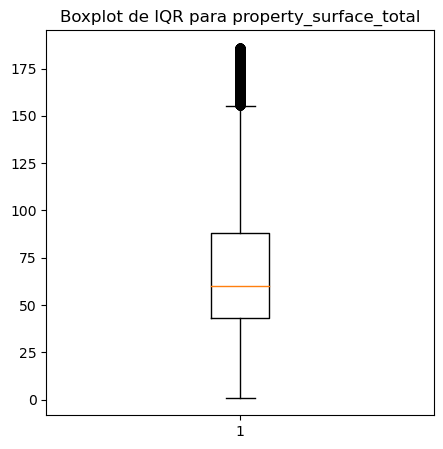

In [93]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [94]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 74 registros en train
Se han eliminado: 20 registros en test


In [95]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [96]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5621. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1309. Constituyen al 7% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


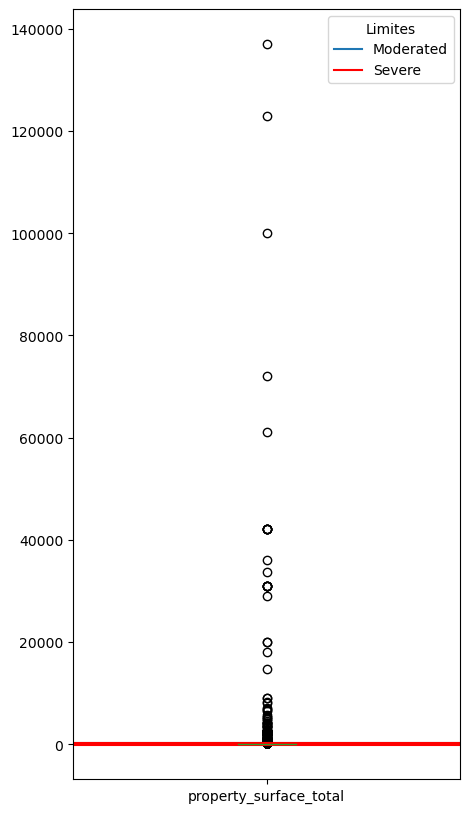

In [97]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3262
272-500     2058
500-750      183
1000-inf      95
750-1000      23
Name: property_surface_total, dtype: int64


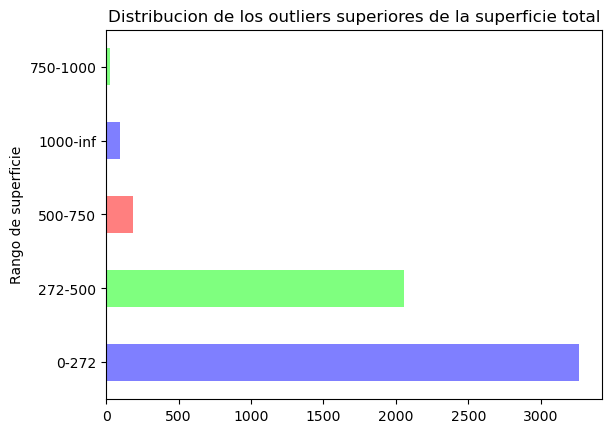

In [98]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [99]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [100]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 301. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 67. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


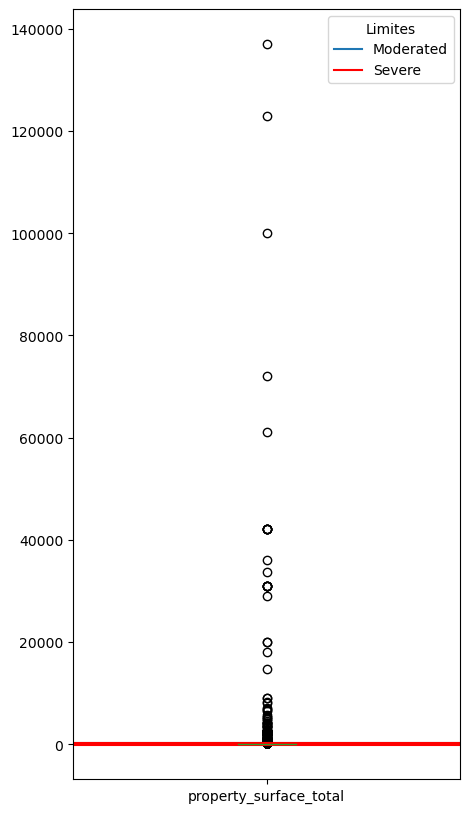

In [101]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [102]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 301 registros en train
Se han eliminado: 67 registros en test


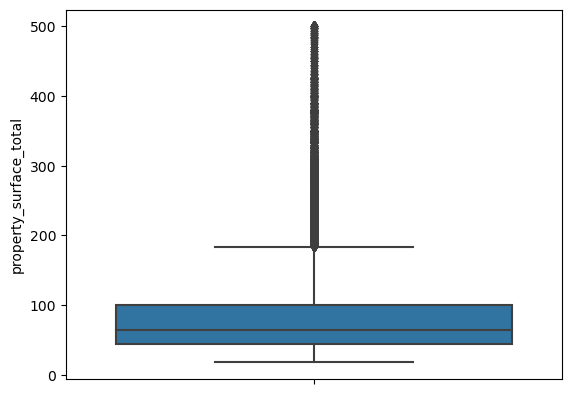

In [103]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73363
outliers encontrados para los property_surface_covered: 5821
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


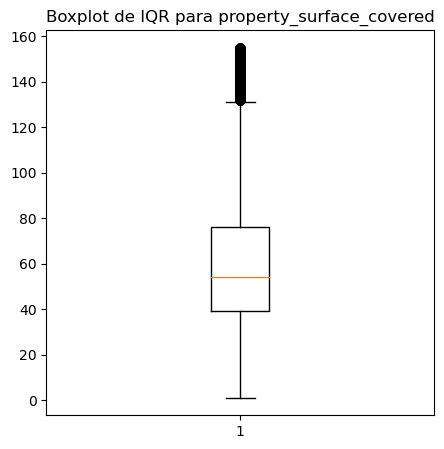

In [104]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [105]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5732. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1345. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


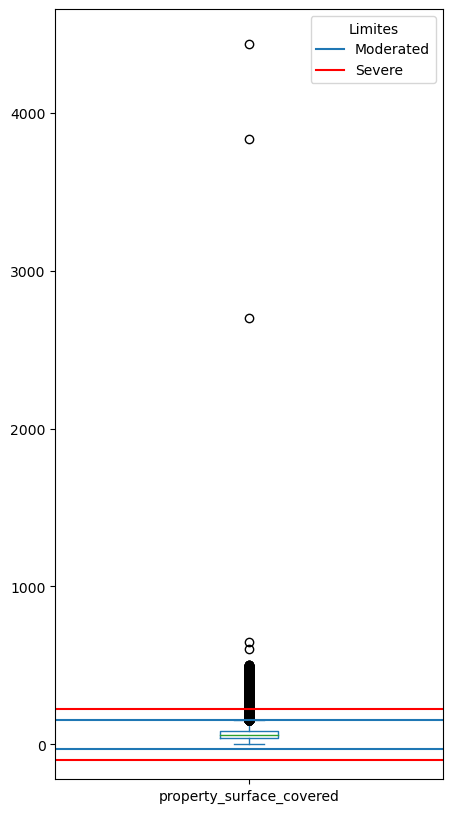

In [106]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


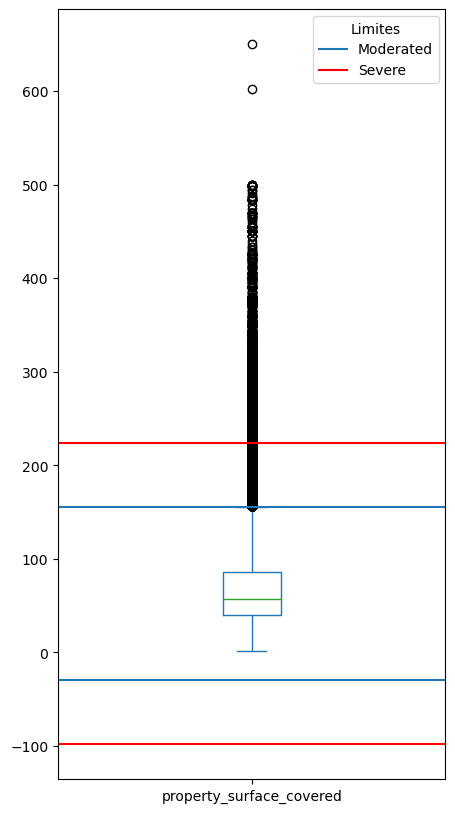

In [107]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3212
224-500     2315
500-750       64
1000-inf      20
750-1000      10
Name: property_surface_covered, dtype: int64


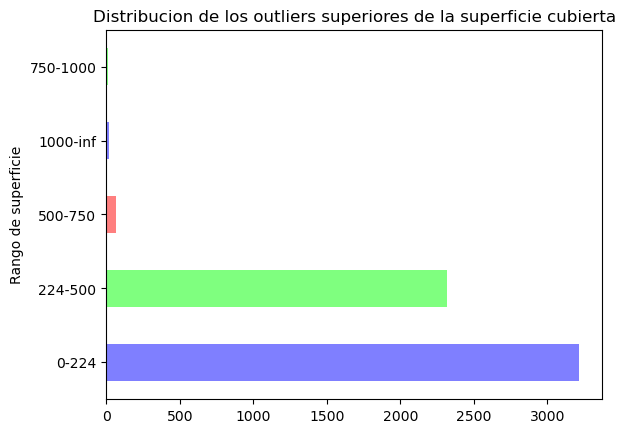

In [108]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [109]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 5 registros en train
Se han eliminado: 2 registros en test


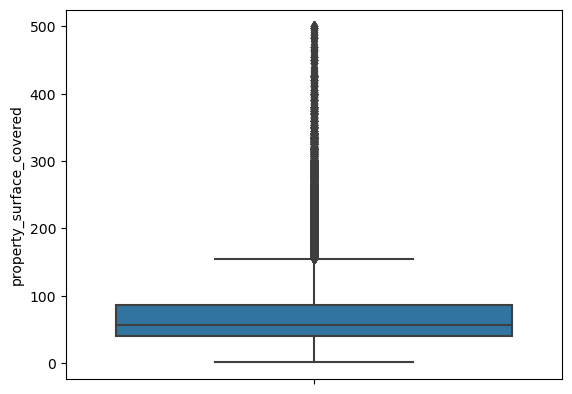

In [110]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73358
outliers encontrados para los latitud: 419
hay 0% de outliers de latitud sobre el ds
limit sup: -34.520237099999996, limite inf: -34.6726715


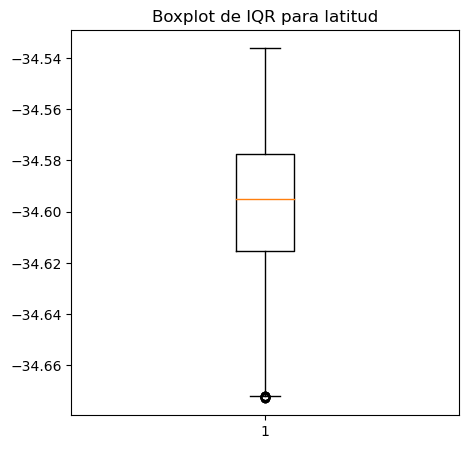

In [111]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73358
outliers encontrados para los longitud: 86
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32475048425002, limite inf: -58.549705229449984


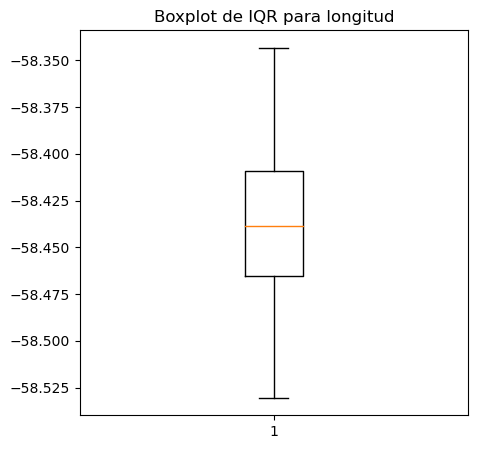

In [112]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [113]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73285. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 73. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17709. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 23. Constituyen al 0% de los datos


#### Metodo Z score

In [114]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [115]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [116]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 542. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 542. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


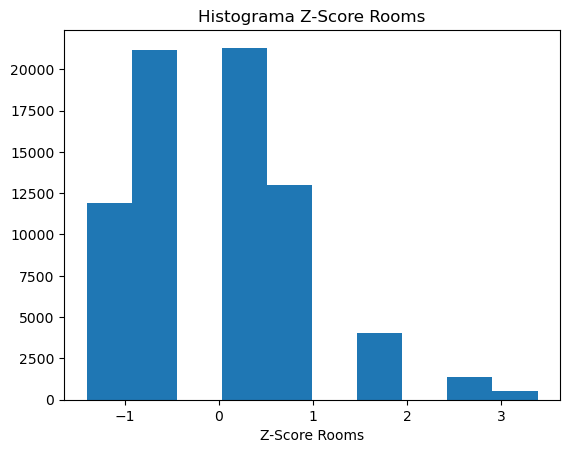

In [117]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [118]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [119]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 628.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 628.Constituyen al 3% de los datos


id  start_date    end_date    latitud  \
362457  BYD99o8nZQMagAdLWknuKw==  2021-01-16  2021-10-09 -34.590568   
278002  2RvD7IEu8Mlz9GPJXPzsyg==  2021-10-21  2022-01-27 -34.605309   
304227  KnJPz4T2aLzhbWY8pjenWg==  2021-04-15  2021-04-16 -34.568785   
32106   dPIq//nTrBSsZom0e2s66g==  2021-05-17  2021-06-05 -34.592038   
317564  VGyfABKgcTYHPfCa/qClqw==  2021-09-29  2021-12-08 -34.602224   
...                          ...         ...         ...        ...   
361931  AprZAT1ZI0mWND6K50w2ZQ==  2021-01-16  2021-09-10 -34.596675   
140905  ybdj+BSc1VdOK/hOAPk12w==  2021-12-08  2022-01-27 -34.594110   
357718  30awZQU13PhjaQgCQUYuGw==  2021-06-29  9999-12-31 -34.609557   
367562  aGQEiEcm9RCeRyFzBj+CpQ==  2021-04-10  2021-08-05 -34.607034   
366678  Q+4HXIPm9geekxL+GMfW1A==  2021-04-10  2021-05-05 -34.587646   

         longitud             place_l3 property_type  property_rooms  \
362457 -58.384887             Recoleta  Departamento             5.0   
278002 -58.407020                 Once            PH             6.0   
304227 -58.457129             Belgrano  Departamento             1.0   
32106  -58.396215             Recoleta  Departamento             7.0   
317564 -58.502863     Villa del Parque          Casa             6.0   
...           ...                  ...           ...             ...   
361931 -58.424455              Palermo            PH             6.0   
140905 -58.377692               Retiro  Departamento             7.0   
357718 -58.474843  Villa General Mitre          Casa             6.0   
367562 -58.382298          San Nicolás  Departamento             7.0   
366678 -58.389200             Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
362457                5.0                   310.0                     310.0   
278002                5.0                   220.0                     220.0   
304227                5.0                    48.0                      33.0   
32106                 5.0                   467.0                     463.0   
317564                5.0                   357.0                     357.0   
...                   ...                     ...                       ...   
361931                5.0                   200.0                     180.0   
140905                6.0                   380.0                     370.0   
357718                5.0                   465.0                     375.0   
367562                6.0                   111.0                     106.0   
366678                5.0                   483.0                     483.0   

        property_price                                     property_title  \
362457        980000.0                           Departamento en Recoleta   
278002        259000.0                                Departamento - Once   
304227         88000.0    VENTA MONOAMBIENTE A ESTRENAR BELGRANO C/PATIO    
32106        1850000.0  Edificio Frances antiguo. Gran recepción. Fren...   
317564        570000.0                     LOTE | Casa - Villa del Parque   
...                ...                                                ...   
361931        445000.0  Hermosa Propiedad con Techos muy altos y Pisos...   
140905        900000.0  Departamento - Retiro -Basavilbaso entre Arena...   
357718        510000.0                             CASA CHALET A LA VENTA   
367562        180000.0  VENTA DEPARTAMENTO HOSTEL 7 AMBIENTES SAN NICOLAS   
366678       2250000.0  DUPLEX en edificio tradicional de gran categor...   

        z_property_bedrooms  
362457             3.301573  
278002             3.301573  
304227             3.301573  
32106              3.301573  
317564             3.301573  
...                     ...  
361931             3.301573  
140905             4.353176  
357718             3.301573  
367562             4.353176  
366678             3.301573  

[628 rows x 14 columns]

In [120]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

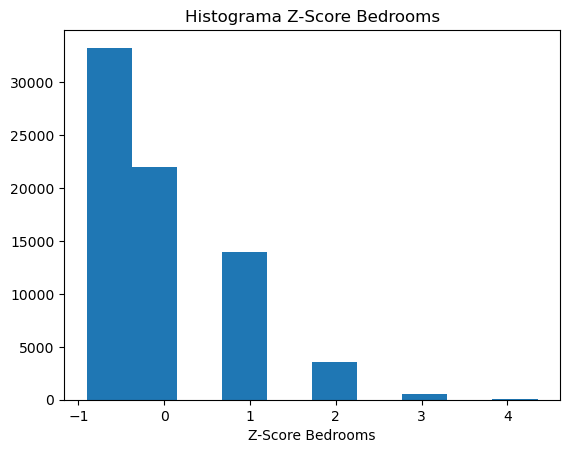

In [121]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [122]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [123]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1841. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1841. Constituyen al 10% de los datos


id  start_date    end_date    latitud  \
79028   FvDQl9v1+iO63pFPPvhtoQ==  2021-11-10  2022-01-27 -34.566451   
430965  KW/OYIFOnwgQn8XaBVEvdQ==  2021-12-16  2022-02-09 -34.620200   
207687  FEWO39GCaWJKso3P3FrqzQ==  2021-02-01  2022-02-17 -34.632703   
41320   KQ+w2cL17bQ3K0Q//UVpxQ==  2021-01-12  2021-02-18 -34.592282   
187517  MC3AfTNEFfk08JRuwtxXEw==  2021-06-05  2021-06-15 -34.599427   

         longitud      place_l3 property_type  property_rooms  \
79028  -58.432328       Palermo  Departamento             5.0   
430965 -58.388560  Constitución          Casa             5.0   
207687 -58.413125         Boedo            PH             4.0   
41320  -58.378571        Retiro  Departamento             7.0   
187517 -58.453127  Villa Crespo          Casa             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
79028                 4.0                   285.0                     250.0   
430965                4.0                   320.0                     295.0   
207687                3.0                   314.0                      88.0   
41320                 4.0                   390.0                     390.0   
187517                4.0                   320.0                     186.0   

        property_price                                     property_title  \
79028        1350000.0                         Departamento - Las Cañitas   
430965        280000.0  Casa 5 ambientes con Quincho, Parrilla y Terraza.   
207687        270000.0  PH 4AMB | TERRAZA | PATIO C/ PARRILLA | EXC. E...   
41320        1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
187517        340000.0       Casa de 5 ambientes en Venta en Villa crespo   

        z_property_surface_total  
79028                   3.019933  
430965                  3.550634  
207687                  3.459657  
41320                   4.612038  
187517                  3.550634

In [124]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

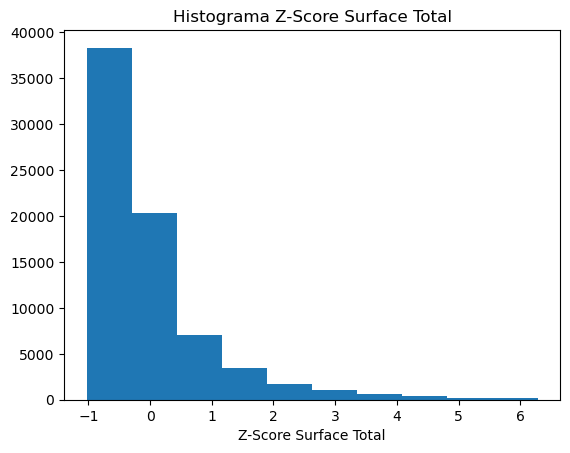

In [125]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [126]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [127]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1766. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1766. Constituyen al 9% de los datos


id  start_date    end_date    latitud  \
79028   FvDQl9v1+iO63pFPPvhtoQ==  2021-11-10  2022-01-27 -34.566451   
430965  KW/OYIFOnwgQn8XaBVEvdQ==  2021-12-16  2022-02-09 -34.620200   
41320   KQ+w2cL17bQ3K0Q//UVpxQ==  2021-01-12  2021-02-18 -34.592282   
362457  BYD99o8nZQMagAdLWknuKw==  2021-01-16  2021-10-09 -34.590568   
238433  WXr7O1YoUEEc0IEd3yS8Sw==  2021-02-27  2021-06-05 -34.585617   
...                          ...         ...         ...        ...   
373996  xrBaZMQUP09ZeYpl3EsxxQ==  2021-05-31  2021-06-05 -34.590369   
366678  Q+4HXIPm9geekxL+GMfW1A==  2021-04-10  2021-05-05 -34.587646   
450057  /yezluMHecVOlxQuyBmRXw==  2021-12-16  2022-02-09 -34.651794   
388663  cCrzoOtKuCtzRpX9VodGtA==  2021-10-12  2021-11-19 -34.587805   
194363  vWJiNxgK3LVMOOm7GV58mA==  2021-11-02  2022-02-02 -34.595522   

         longitud      place_l3 property_type  property_rooms  \
79028  -58.432328       Palermo  Departamento             5.0   
430965 -58.388560  Constitución          Casa             5.0   
41320  -58.378571        Retiro  Departamento             7.0   
362457 -58.384887      Recoleta  Departamento             5.0   
238433 -58.396056      Recoleta  Departamento             4.0   
...           ...           ...           ...             ...   
373996 -58.381500      Recoleta  Departamento             6.0   
366678 -58.389200      Recoleta  Departamento             6.0   
450057 -58.524156       Liniers          Casa             4.0   
388663 -58.388887      Recoleta  Departamento             5.0   
194363 -58.387550      Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
79028                 4.0                   285.0                     250.0   
430965                4.0                   320.0                     295.0   
41320                 4.0                   390.0                     390.0   
362457                5.0                   310.0                     310.0   
238433                3.0                   311.0                     300.0   
...                   ...                     ...                       ...   
373996                3.0                   287.0                     287.0   
366678                5.0                   483.0                     483.0   
450057                3.0                   360.0                     300.0   
388663                3.0                   335.0                     335.0   
194363                4.0                   270.0                     270.0   

        property_price                                     property_title  \
79028        1350000.0                         Departamento - Las Cañitas   
430965        280000.0  Casa 5 ambientes con Quincho, Parrilla y Terraza.   
41320        1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
362457        980000.0                           Departamento en Recoleta   
238433       1600000.0                            Departamento - Recoleta   
...                ...                                                ...   
373996       1200000.0  VENTA regio semipiso ALTO vista al este al río...   
366678       2250000.0  DUPLEX en edificio tradicional de gran categor...   
450057        490000.0  Venta Casa Chalet 4 ambientes a nueva! Oportun...   
388663       1900000.0  VENTA piso ALTO en torre M.R.Alvarez!!  sobre ...   
194363        790000.0                              1 - Santa Fe Av. 1400   

        z_property_surface_covered  
79028                     3.128632  
430965                    3.931718  
41320                     5.627122  
362457                    4.199413  
238433                    4.020950  
...                            ...  
373996                    3.788947  
366678                    7.286833  
450057                    4.020950  
388663                    4.645572  
194363                    3.485559  

[1766 rows x 14 columns]

In [128]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

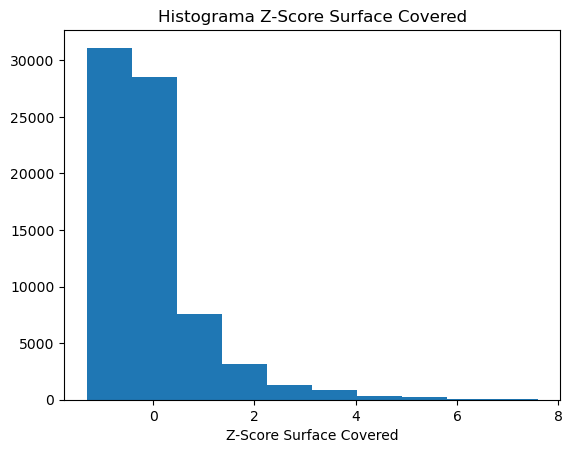

In [129]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [130]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [131]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 76. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 76. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
424020  gs9mOziVxiwQyC/HrVTWNA==  2021-12-16  2022-03-25 -30.436760   
190851  0Vab48sotk0177DS5U9TUQ==  2021-11-01  2022-01-27 -31.360967   
102594  3Ev2cyd+v7SL0HgAq4h6eA==  2021-05-28  2021-06-05 -33.030773   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.581620   
...                          ...         ...         ...        ...   
248772  bjxIbEY7mcbCYqnpCBMJcQ==  2021-04-29  2021-11-04 -27.469213   
32726   +FDpBzP4FF/KqX+qnnnbgA==  2021-02-08  2021-04-06 -33.060356   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
226091  bGuKxD4LrPP684b7MGyziA==  2021-01-09  2021-01-10 -33.081030   
190815  TsD8qkyop/j270aTnhe0zg==  2021-11-01  2022-01-27 -31.351340   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
9156   -64.179004      NaN  Departamento             1.0                1.0   
424020 -64.317055      NaN          Casa             6.0                3.0   
190851 -64.343824      NaN          Casa             3.0                2.0   
102594 -60.627277      NaN  Departamento             5.0                3.0   
134196 -56.682310      NaN          Casa             4.0                2.0   
...           ...      ...           ...             ...                ...   
248772 -58.830635      NaN          Casa             4.0                3.0   
32726  -68.479394      NaN            PH             2.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
226091 -68.468140      NaN  Departamento             2.0                1.0   
190815 -64.317609      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
9156                      38.0                      38.0         55000.0   
424020                   172.0                     112.0        134000.0   
190851                   150.0                      82.0         65000.0   
102594                   430.0                     430.0         73000.0   
134196                   105.0                     105.0        200000.0   
...                        ...                       ...             ...   
248772                   220.0                     220.0        295000.0   
32726                     49.0                      49.0         57000.0   
190751                    55.0                      50.0         35000.0   
226091                    51.0                      49.0         85000.0   
190815                   240.0                      80.0         76000.0   

                                           property_title  z_latitud  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  21.279432  
424020            Venta Casa en Manzanares Barrio Abierto  27.614200  
190851               Dúplex barrio Los Prados - La Calera  21.475146  
102594                                 OPORTUNIDAD VENTA   10.383439  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación  46.579500  
...                                                   ...        ...  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  47.326164  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  10.186935  
190751                        Housing  en Cuesta Colorada  21.510214  
226091  Venta Dpto 2 Amb,San Martin -pozo-unico en la ...  10.049608  
190815               Casa  B° Cuesta Colorada - La Calera  21.539091  

[76 rows x 14 columns]

In [132]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 10. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 10. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   
208085  2Xn6RKpg2Fps+wLCsSJavw==  2021-02-01  9999-12-31 -41.085373   
105792  LHDYXTfhEERw7S90k5WA+Q==  2021-03-11  2021-06-05 -41.084900   
106288  Hrs1e9U6zkvjRh6gD/BBoQ==  2021-03-11  2021-06-05 -40.131723   
106297  oqSIUrrkBRMakJoEW/hYPg==  2021-03-11  2021-06-05 -41.086352   
410404  KeQ40Z6VTXMHoq4j8oOp+A==  2021-03-02  2021-06-05 -38.964493   
155333  j+0Iyd6D8YGQxE3u+nJiQQ==  2021-04-05  2021-04-15 -41.164123   
324200  SSbx+/6MNgxE6rIDYPA0+A==  2021-03-03  2021-06-05 -38.940227   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
10486  -71.438923      NaN          Casa             4.0                3.0   
457631 -67.718089      NaN  Departamento             3.0                2.0   
208085 -71.185766      NaN  Departamento             2.0                1.0   
105792 -71.187159      NaN  Departamento             1.0                1.0   
106288 -71.299436      NaN  Departamento             2.0                1.0   
106297 -71.185720      NaN  Departamento             2.0                1.0   
410404 -68.075830      NaN          Casa             7.0                5.0   
155333 -71.415420      NaN          Casa             3.0                2.0   
324200 -68.073865      NaN  Departamento             3.0                2.0   
131188 -71.182747      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
10486                    100.0                     100.0        410000.0   
457631                   121.0                     100.0        375000.0   
208085                    60.0                      50.0        142000.0   
105792                    53.0                      53.0        145000.0   
106288                    44.0                      44.0        105000.0   
106297                    53.0                      53.0        145000.0   
410404                   218.0                     218.0        230000.0   
155333                    70.0                      70.0        380000.0   
324200                    55.0                      55.0        120000.0   
131188                    66.0                      56.0        135000.0   

                                           property_title   z_latitud  
10486   BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...  -43.640453  
457631                Depto 3 ambientes Arboris Las Lomas -127.500816  
208085  Excelente departamento en venta en Dina Huapi ...  -43.119333  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -43.116186  
106288  Hermoso departamento en venta, totalmente equi...  -36.784700  
106297  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...  -43.125834  
410404  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...  -29.031363  
155333  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...  -43.642430  
324200  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...  -28.870174  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -43.103581

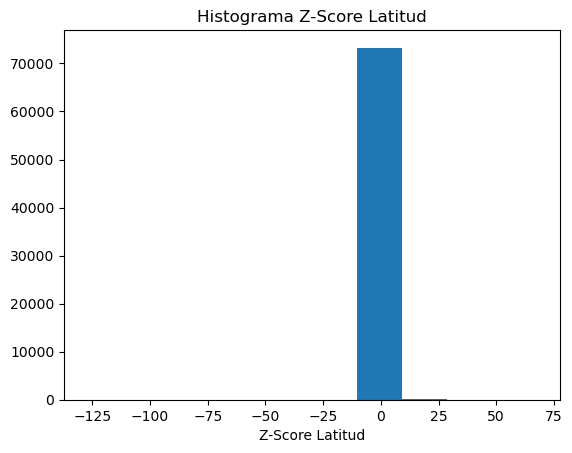

In [133]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [134]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
259023  Qgy7pmJ4NulNrdbxa8a7MQ==  2021-12-13  2021-12-23 -34.555436   
95258   QO1fBv/XWsHIqP59T0Xngg==  2021-09-24  2022-03-09 -34.577124   
108662  9yo77b8vzfYAXyFJHVhLiw==  2021-07-16  9999-12-31 -34.639306   
145714  HEyW45D+cF+tLUGaQPDgXg==  2021-08-30  2022-01-27 -34.563572   

         longitud       place_l3 property_type  property_rooms  \
150679 -58.389144       Recoleta  Departamento             4.0   
259023 -58.475303          Nuñez  Departamento             3.0   
95258  -58.475892  Villa Urquiza          Casa             4.0   
108662 -58.368501       Barracas  Departamento             2.0   
145714 -58.439407        Palermo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
259023                2.0                    83.0                      83.0   
95258                 3.0                   150.0                     105.0   
108662                1.0                   122.0                      75.0   
145714                2.0                    50.0                      50.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
259023        100000.0                               Departamento - Nuñez   
95258         229000.0   Casa en venta 4Amb c/patio y terraza - Urquiza R   
108662        195000.0                            Departamento - Barracas   
145714        115000.0  Dpto. 3 ambientes, con cocina independiente y ...   

        z_latitud  
150679   0.029704  
259023   0.255847  
95258    0.111786  
108662  -0.301258  
145714   0.201807

In [135]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 4. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 4. Constituyen al 0% de los datos


id  start_date    end_date   latitud   longitud  \
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q==  2021-05-11  2021-05-12 -27.63119 -55.496357   
234893  FmDOCgqTy/T9iZXvORmyuw==  2021-06-02  2021-06-18 -27.63119 -55.496357   
220851  /4CiKZFK0D3wJRClv4OO8Q==  2021-06-30  2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
134196      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
134196                   105.0                     105.0        200000.0   
173667                    98.0                      88.0        269000.0   
234893                    98.0                      88.0        269000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  z_longitud  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.855757  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.466253  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.466253  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    6.855757

In [136]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
424020  gs9mOziVxiwQyC/HrVTWNA==  2021-12-16  2022-03-25 -30.436760   
190851  0Vab48sotk0177DS5U9TUQ==  2021-11-01  2022-01-27 -31.360967   
102594  3Ev2cyd+v7SL0HgAq4h6eA==  2021-05-28  2021-06-05 -33.030773   
...                          ...         ...         ...        ...   
32726   +FDpBzP4FF/KqX+qnnnbgA==  2021-02-08  2021-04-06 -33.060356   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
226091  bGuKxD4LrPP684b7MGyziA==  2021-01-09  2021-01-10 -33.081030   
190815  TsD8qkyop/j270aTnhe0zg==  2021-11-01  2022-01-27 -31.351340   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
10486  -71.438923      NaN          Casa             4.0                3.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
424020 -64.317055      NaN          Casa             6.0                3.0   
190851 -64.343824      NaN          Casa             3.0                2.0   
102594 -60.627277      NaN  Departamento             5.0                3.0   
...           ...      ...           ...             ...                ...   
32726  -68.479394      NaN            PH             2.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
226091 -68.468140      NaN  Departamento             2.0                1.0   
190815 -64.317609      NaN          Casa             3.0                2.0   
131188 -71.182747      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
10486                    100.0                     100.0        410000.0   
9156                      38.0                      38.0         55000.0   
424020                   172.0                     112.0        134000.0   
190851                   150.0                      82.0         65000.0   
102594                   430.0                     430.0         73000.0   
...                        ...                       ...             ...   
32726                     49.0                      49.0         57000.0   
190751                    55.0                      50.0         35000.0   
226091                    51.0                      49.0         85000.0   
190815                   240.0                      80.0         76000.0   
131188                    66.0                      56.0        135000.0   

                                           property_title  z_longitud  
10486   BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...  -50.511875  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  -22.288302  
424020            Venta Casa en Manzanares Barrio Abierto  -22.824986  
190851               Dúplex barrio Los Prados - La Calera  -22.929052  
102594                                 OPORTUNIDAD VENTA    -8.480652  
...                                                   ...         ...  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -39.006447  
190751                        Housing  en Cuesta Colorada  -22.808947  
226091  Venta Dpto 2 Amb,San Martin -pozo-unico en la ...  -38.962696  
190815               Casa  B° Cuesta Colorada - La Calera  -22.827140  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -49.515970  

[80 rows x 14 columns]

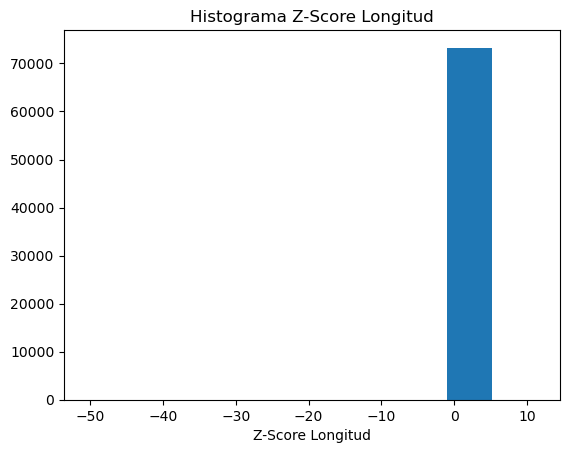

In [137]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [138]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [139]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [140]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [141]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

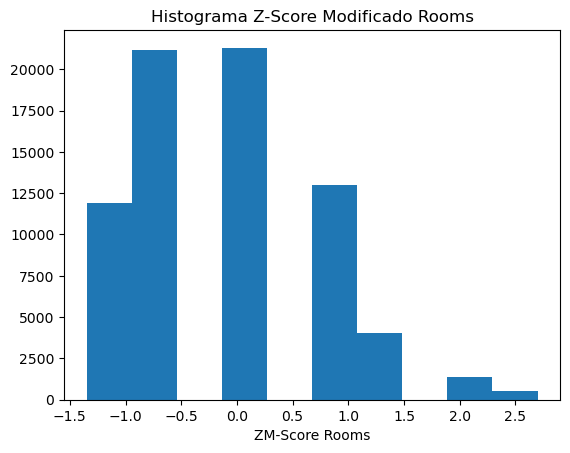

In [142]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [143]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [144]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [145]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

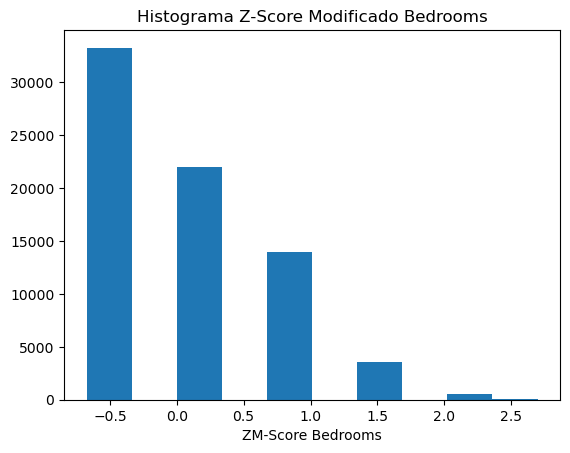

In [146]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [147]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
259023  Qgy7pmJ4NulNrdbxa8a7MQ==  2021-12-13  2021-12-23 -34.555436   
95258   QO1fBv/XWsHIqP59T0Xngg==  2021-09-24  2022-03-09 -34.577124   
108662  9yo77b8vzfYAXyFJHVhLiw==  2021-07-16  9999-12-31 -34.639306   
145714  HEyW45D+cF+tLUGaQPDgXg==  2021-08-30  2022-01-27 -34.563572   

         longitud       place_l3 property_type  property_rooms  \
150679 -58.389144       Recoleta  Departamento             4.0   
259023 -58.475303          Nuñez  Departamento             3.0   
95258  -58.475892  Villa Urquiza          Casa             4.0   
108662 -58.368501       Barracas  Departamento             2.0   
145714 -58.439407        Palermo  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
259023                2.0                    83.0                      83.0   
95258                 3.0                   150.0                     105.0   
108662                1.0                   122.0                      75.0   
145714                2.0                    50.0                      50.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
259023        100000.0                               Departamento - Nuñez   
95258         229000.0   Casa en venta 4Amb c/patio y terraza - Urquiza R   
108662        195000.0                            Departamento - Barracas   
145714        115000.0  Dpto. 3 ambientes, con cocina independiente y ...   

        zm_property_surface_total  
150679                   3.597333  
259023                   0.533979  
95258                    2.416958  
108662                   1.630042  
145714                  -0.393458

In [148]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5517. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5517. Constituyen al 31% de los datos


id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
79028   FvDQl9v1+iO63pFPPvhtoQ==  2021-11-10  2022-01-27 -34.566451   
30757   CO9SckemaRE7um6too84tg==  2021-03-29  2021-04-15 -34.572745   
36523   IKhPxVNaTSpzPTi8Nyg4Zw==  2021-09-21  2022-02-09 -34.644718   
301107  uHlmtBpi/Zx5H0xWI/u/ow==  2021-08-10  2021-09-03 -34.588502   
...                          ...         ...         ...        ...   
82472   STzAewrRn1azHOlu8JnbBQ==  2021-03-12  2021-06-05 -34.610046   
432208  iiFH+Y9zZqdG5PF2qCnSqw==  2021-12-16  2022-03-25 -34.585723   
15559   KRFfonZnfiCUcs0tslLrCw==  2021-04-22  2021-08-17 -34.586046   
194363  vWJiNxgK3LVMOOm7GV58mA==  2021-11-02  2022-02-02 -34.595522   
10977   jKN9+aupteXwnX5p5LBoDw==  2021-01-13  9999-12-31 -34.566244   

         longitud          place_l3 property_type  property_rooms  \
150679 -58.389144          Recoleta  Departamento             4.0   
79028  -58.432328           Palermo  Departamento             5.0   
30757  -58.439645           Palermo          Casa             7.0   
36523  -58.415658           Pompeya          Casa             3.0   
301107 -58.388095          Recoleta  Departamento             4.0   
...           ...               ...           ...             ...   
82472  -58.361382     Puerto Madero  Departamento             5.0   
432208 -58.488086  Villa Pueyrredón          Casa             5.0   
15559  -58.480357       Parque Chas            PH             4.0   
194363 -58.387550          Recoleta  Departamento             6.0   
10977  -58.441729          Belgrano  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
79028                 4.0                   285.0                     250.0   
30757                 4.0                   277.0                     200.0   
36523                 2.0                   211.0                     145.0   
301107                2.0                   210.0                     201.0   
...                   ...                     ...                       ...   
82472                 3.0                   215.0                     215.0   
432208                3.0                   337.0                     178.0   
15559                 3.0                   205.0                     140.0   
194363                4.0                   270.0                     270.0   
10977                 4.0                   204.0                     195.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
79028        1350000.0                         Departamento - Las Cañitas   
30757         510000.0  Venta casa Belgrano lote propio 6 amb sotano y...   
36523         168000.0      VENTA PH 3 AMB C/ COCHERA, 2 PATIOS Y TERRAZA   
301107        790000.0  VENTA DUPLEX penthouse sobre Av Alvear Vista R...   
...                ...                                                ...   
82472        1650000.0                       Departamento - Puerto Madero   
432208        440000.0  Venta Casa 5amb  Jardín/pileta y Cochera Agron...   
15559         249000.0      PH 4 AMBIENTES C/QUINCHO TERRAZA SIN EXPENSAS   
194363        790000.0                              1 - Santa Fe Av. 1400   
10977         635000.0  VENTA. DEPTO 5 AMBIENTES CON DEPENDENCIA EN BE...   

        zm_property_surface_total  
150679                   3.597333  
79028                    6.211021  
30757                    5.986187  
36523                    4.131312  
301107                   4.103208  
...                           ...  
82472                    4.243729  
432208                   7.672438  
15559                    3.962687  
194363                   5.789458  
10977                    3.934583  

[5517 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

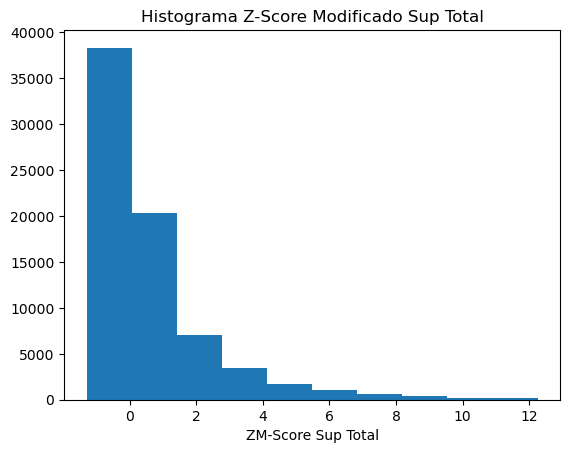

In [150]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [151]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [152]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
79028   FvDQl9v1+iO63pFPPvhtoQ==  2021-11-10  2022-01-27 -34.566451   
30757   CO9SckemaRE7um6too84tg==  2021-03-29  2021-04-15 -34.572745   
301107  uHlmtBpi/Zx5H0xWI/u/ow==  2021-08-10  2021-09-03 -34.588502   
430965  KW/OYIFOnwgQn8XaBVEvdQ==  2021-12-16  2022-02-09 -34.620200   
...                          ...         ...         ...        ...   
365079  OuBa10+CHOceQMIr6vIigQ==  2021-04-10  2021-06-05 -34.607467   
82472   STzAewrRn1azHOlu8JnbBQ==  2021-03-12  2021-06-05 -34.610046   
432208  iiFH+Y9zZqdG5PF2qCnSqw==  2021-12-16  2022-03-25 -34.585723   
194363  vWJiNxgK3LVMOOm7GV58mA==  2021-11-02  2022-02-02 -34.595522   
10977   jKN9+aupteXwnX5p5LBoDw==  2021-01-13  9999-12-31 -34.566244   

         longitud          place_l3 property_type  property_rooms  \
150679 -58.389144          Recoleta  Departamento             4.0   
79028  -58.432328           Palermo  Departamento             5.0   
30757  -58.439645           Palermo          Casa             7.0   
301107 -58.388095          Recoleta  Departamento             4.0   
430965 -58.388560      Constitución          Casa             5.0   
...           ...               ...           ...             ...   
365079 -58.421907           Almagro  Departamento             4.0   
82472  -58.361382     Puerto Madero  Departamento             5.0   
432208 -58.488086  Villa Pueyrredón          Casa             5.0   
194363 -58.387550          Recoleta  Departamento             6.0   
10977  -58.441729          Belgrano  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
79028                 4.0                   285.0                     250.0   
30757                 4.0                   277.0                     200.0   
301107                2.0                   210.0                     201.0   
430965                4.0                   320.0                     295.0   
...                   ...                     ...                       ...   
365079                3.0                   210.0                     190.0   
82472                 3.0                   215.0                     215.0   
432208                3.0                   337.0                     178.0   
194363                4.0                   270.0                     270.0   
10977                 4.0                   204.0                     195.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
79028        1350000.0                         Departamento - Las Cañitas   
30757         510000.0  Venta casa Belgrano lote propio 6 amb sotano y...   
301107        790000.0  VENTA DUPLEX penthouse sobre Av Alvear Vista R...   
430965        280000.0  Casa 5 ambientes con Quincho, Parrilla y Terraza.   
...                ...                                                ...   
365079        395000.0            Hermoso y antiguo departamento de 200m2   
82472        1650000.0                       Departamento - Puerto Madero   
432208        440000.0  Venta Casa 5amb  Jardín/pileta y Cochera Agron...   
194363        790000.0                              1 - Santa Fe Av. 1400   
10977         635000.0  VENTA. DEPTO 5 AMBIENTES CON DEPENDENCIA EN BE...   

        zm_property_surface_covered  
150679                     3.810925  
79028                      6.508925  
30757                      4.822675  
301107                     4.856400  
430965                     8.026550  
...                             ...  
365079                     4.485425  
82472                      5.328550  
432208                     4.080725  
194363                     7.183425  
10977                      4.654050  

[5245 rows x 14 c

In [153]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

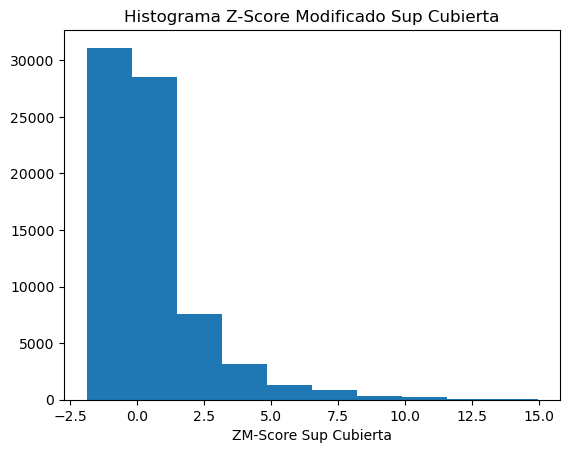

In [154]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [155]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [156]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id  start_date    end_date    latitud  \
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
424020  gs9mOziVxiwQyC/HrVTWNA==  2021-12-16  2022-03-25 -30.436760   
190851  0Vab48sotk0177DS5U9TUQ==  2021-11-01  2022-01-27 -31.360967   
102594  3Ev2cyd+v7SL0HgAq4h6eA==  2021-05-28  2021-06-05 -33.030773   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.581620   
...                          ...         ...         ...        ...   
248772  bjxIbEY7mcbCYqnpCBMJcQ==  2021-04-29  2021-11-04 -27.469213   
32726   +FDpBzP4FF/KqX+qnnnbgA==  2021-02-08  2021-04-06 -33.060356   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
226091  bGuKxD4LrPP684b7MGyziA==  2021-01-09  2021-01-10 -33.081030   
190815  TsD8qkyop/j270aTnhe0zg==  2021-11-01  2022-01-27 -31.351340   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
9156   -64.179004      NaN  Departamento             1.0                1.0   
424020 -64.317055      NaN          Casa             6.0                3.0   
190851 -64.343824      NaN          Casa             3.0                2.0   
102594 -60.627277      NaN  Departamento             5.0                3.0   
134196 -56.682310      NaN          Casa             4.0                2.0   
...           ...      ...           ...             ...                ...   
248772 -58.830635      NaN          Casa             4.0                3.0   
32726  -68.479394      NaN            PH             2.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
226091 -68.468140      NaN  Departamento             2.0                1.0   
190815 -64.317609      NaN          Casa             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
9156                      38.0                      38.0         55000.0   
424020                   172.0                     112.0        134000.0   
190851                   150.0                      82.0         65000.0   
102594                   430.0                     430.0         73000.0   
134196                   105.0                     105.0        200000.0   
...                        ...                       ...             ...   
248772                   220.0                     220.0        295000.0   
32726                     49.0                      49.0         57000.0   
190751                    55.0                      50.0         35000.0   
226091                    51.0                      49.0         85000.0   
190815                   240.0                      80.0         76000.0   

                                           property_title  zm_latitud  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  113.721374  
424020            Venta Casa en Manzanares Barrio Abierto  147.560956  
190851               Dúplex barrio Los Prados - La Calera  114.766856  
102594                                 OPORTUNIDAD VENTA    55.516275  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación  248.871335  
...                                                   ...         ...  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  252.859926  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA   54.466573  
190751                        Housing  en Cuesta Colorada  114.954187  
226091  Venta Dpto 2 Amb,San Martin -pozo-unico en la ...   53.732987  
190815               Casa  B° Cuesta Colorada - La Calera  115.108443  

[76 rows x 14 columns]

In [157]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 28. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 28. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   
431958  KcYM9EqNffHbcXZT+GcNaQ==  2021-12-16  2022-02-09 -34.694062   
208085  2Xn6RKpg2Fps+wLCsSJavw==  2021-02-01  9999-12-31 -41.085373   
351916  BKk+pz+G7Tajvr6LE+9UZw==  2021-06-25  2021-07-17 -34.694900   
317537  x1BlLb49Up0aSX9yuzhrMw==  2021-09-29  2022-03-25 -34.698989   
82540   j0CggSFoqC9J+F1N9h91wg==  2021-03-12  2021-03-13 -34.698989   
105792  LHDYXTfhEERw7S90k5WA+Q==  2021-03-11  2021-06-05 -41.084900   
208451  r5h8YGMTL3OG6u8wekYDWg==  2021-02-01  2021-05-02 -34.694366   
106288  Hrs1e9U6zkvjRh6gD/BBoQ==  2021-03-11  2021-06-05 -40.131723   
106297  oqSIUrrkBRMakJoEW/hYPg==  2021-03-11  2021-06-05 -41.086352   
161352  GsZ5hegnoxnRL4wSr7DRag==  2021-10-07  2021-11-02 -34.694062   
333366  aN+caRwr6laNeGIm8iZd9Q==  2021-09-17  2021-09-18 -34.694062   
171545  2IMMhWMUVZd6htI0Xo9m8Q==  2021-04-19  2021-06-05 -34.694322   
210013  896AVJRoLi1HWY3kiM79UQ==  2021-07-22  2021-07-31 -34.694062   
308365  j4l0DxeSfN6KnNMYSo6bSg==  2021-04-28  2021-05-01 -34.694900   
8802    Bvx15ijE/oSwZrBaowoSaQ==  2021-05-18  2021-05-19 -34.694062   
411779  jt4VEm3y2Ktb573eFDHQUw==  2021-03-02  2021-03-12 -34.698989   
146879  d25d7RgaAYPDgDV2L7hxiA==  2021-08-19  2021-08-27 -34.694062   
410404  KeQ40Z6VTXMHoq4j8oOp+A==  2021-03-02  2021-06-05 -38.964493   
155333  j+0Iyd6D8YGQxE3u+nJiQQ==  2021-04-05  2021-04-15 -41.164123   
25281   z1w0RvkvD+O+9fEwEU65KQ==  2021-06-24  2021-07-03 -34.694062   
65844   0tGMaOsXgkOAnx8GSH1pmA==  2021-05-15  2021-05-25 -34.698989   
15816   Lqn4md2saTIqk1nSZ8+MXg==  2021-04-22  2021-04-25 -34.694062   
324200  SSbx+/6MNgxE6rIDYPA0+A==  2021-03-03  2021-06-05 -38.940227   
271609  pMxqmA1WxzslUoiQPG4qFg==  2021-06-19  2021-07-05 -34.694451   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   
250707  n/VGq/lp+AH1XRd4RSHphg==  2021-04-29  2021-05-15 -34.698989   

         longitud         place_l3 property_type  property_rooms  \
10486  -71.438923              NaN          Casa             4.0   
457631 -67.718089              NaN  Departamento             3.0   
431958 -58.466105  Villa Riachuelo          Casa             5.0   
208085 -71.185766              NaN  Departamento             2.0   
351916 -58.469161     Villa Lugano          Casa             2.0   
317537 -58.469994  Villa Riachuelo  Departamento             4.0   
82540  -58.469994  Villa Riachuelo  Departamento             4.0   
105792 -71.187159              NaN  Departamento             1.0   
208451 -58.468208     Villa Lugano  Departamento             2.0   
106288 -71.299436              NaN  Departamento             2.0   
106297 -71.185720              NaN  Departamento             2.0   
161352 -58.466105  Villa Riachuelo          Casa             5.0   
333366 -58.466105  Villa Riachuelo          Casa             5.0   
171545 -58.469549     Villa Lugano            PH             3.0   
210013 -58.466105  Villa Riachuelo          Casa             4.0   
308365 -58.469161     Villa Lugano          Casa             2.0   
8802   -58.466105  Villa Riachuelo          Casa             4.0   
411779 -58.469994  Villa Riachuelo  Departamento             4.0   
146879 -58.466105  Villa Riachuelo          Casa             4.0   
410404 -68.075830              NaN          Casa             7.0   
155333 -71.415420              NaN          Casa             3.0   
25281  -58.466105  Villa Riachuelo          Casa             4.0   
65844  -58.469994  Villa Riachuelo  Departamento             4.0   
15816  -58.466105  Villa Riachuelo          Casa             4.0   
324200 -68.073865              NaN  Departamento             3.0   
271609 -58.467532     Villa Lugano          Casa             3.0   
131188 -71.182747              NaN  Departamento             2.0   
250707 -58.469994  Villa Riachuelo  Departamento             4.0  

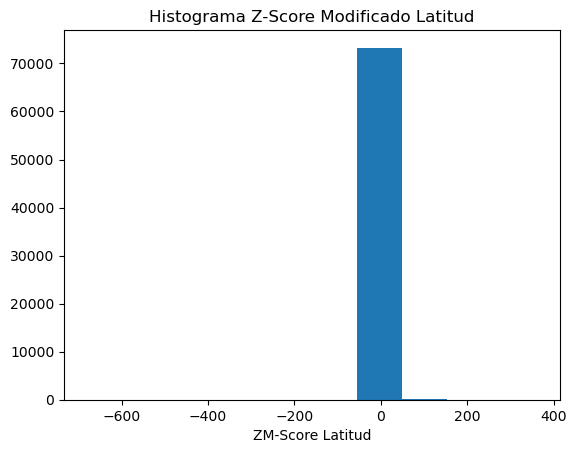

In [158]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [159]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [160]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id  start_date    end_date   latitud   longitud  \
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q==  2021-05-11  2021-05-12 -27.63119 -55.496357   
234893  FmDOCgqTy/T9iZXvORmyuw==  2021-06-02  2021-06-18 -27.63119 -55.496357   
220851  /4CiKZFK0D3wJRClv4OO8Q==  2021-06-30  2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
134196      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
134196                   105.0                     105.0        200000.0   
173667                    98.0                      88.0        269000.0   
234893                    98.0                      88.0        269000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  zm_longitud  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.354557  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.955596  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.955596  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.354557

In [161]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 82. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 82. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
424020  gs9mOziVxiwQyC/HrVTWNA==  2021-12-16  2022-03-25 -30.436760   
190851  0Vab48sotk0177DS5U9TUQ==  2021-11-01  2022-01-27 -31.360967   
102594  3Ev2cyd+v7SL0HgAq4h6eA==  2021-05-28  2021-06-05 -33.030773   
...                          ...         ...         ...        ...   
32726   +FDpBzP4FF/KqX+qnnnbgA==  2021-02-08  2021-04-06 -33.060356   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
226091  bGuKxD4LrPP684b7MGyziA==  2021-01-09  2021-01-10 -33.081030   
190815  TsD8qkyop/j270aTnhe0zg==  2021-11-01  2022-01-27 -31.351340   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
10486  -71.438923      NaN          Casa             4.0                3.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
424020 -64.317055      NaN          Casa             6.0                3.0   
190851 -64.343824      NaN          Casa             3.0                2.0   
102594 -60.627277      NaN  Departamento             5.0                3.0   
...           ...      ...           ...             ...                ...   
32726  -68.479394      NaN            PH             2.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
226091 -68.468140      NaN  Departamento             2.0                1.0   
190815 -64.317609      NaN          Casa             3.0                2.0   
131188 -71.182747      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
10486                    100.0                     100.0        410000.0   
9156                      38.0                      38.0         55000.0   
424020                   172.0                     112.0        134000.0   
190851                   150.0                      82.0         65000.0   
102594                   430.0                     430.0         73000.0   
...                        ...                       ...             ...   
32726                     49.0                      49.0         57000.0   
190751                    55.0                      50.0         35000.0   
226091                    51.0                      49.0         85000.0   
190815                   240.0                      80.0         76000.0   
131188                    66.0                      56.0        135000.0   

                                           property_title  zm_longitud  
10486   BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...  -313.523334  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  -138.439489  
424020            Venta Casa en Manzanares Barrio Abierto  -141.768787  
190851               Dúplex barrio Los Prados - La Calera  -142.414358  
102594                                 OPORTUNIDAD VENTA    -52.784261  
...                                                   ...          ...  
32726    DEPARTAMENTO AL FRENTE EN SAN ANDRÉS PLANTA BAJA  -242.149854  
190751                        Housing  en Cuesta Colorada  -141.669289  
226091  Venta Dpto 2 Amb,San Martin -pozo-unico en la ...  -241.878447  
190815               Casa  B° Cuesta Colorada - La Calera  -141.782148  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -307.345275  

[82 rows x 14 columns]

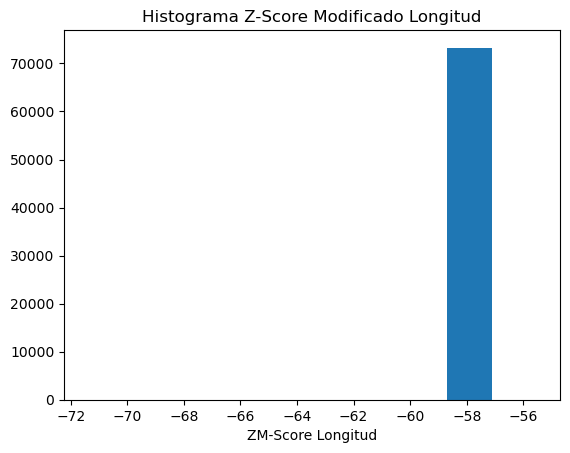

In [162]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [163]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [164]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [165]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

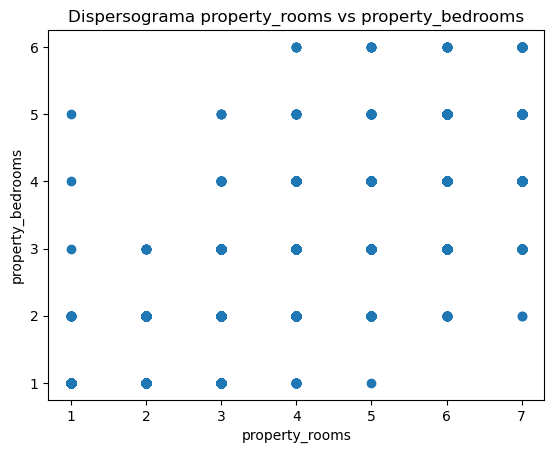

In [166]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [167]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
150679             4.0                3.0     1.477503
259023             3.0                2.0     0.041217
95258              4.0                3.0     1.477503
108662             2.0                1.0     1.159065
145714             3.0                2.0     0.041217

<AxesSubplot:ylabel='mahalanobis'>

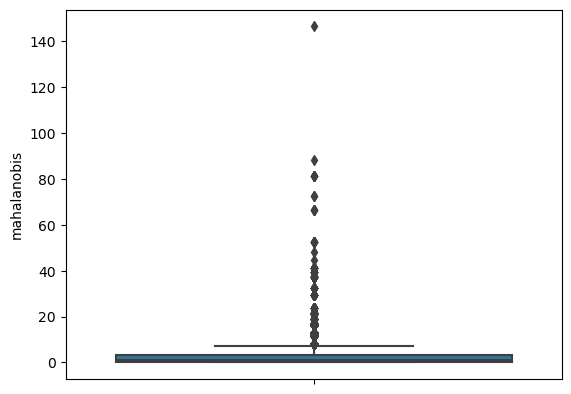

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

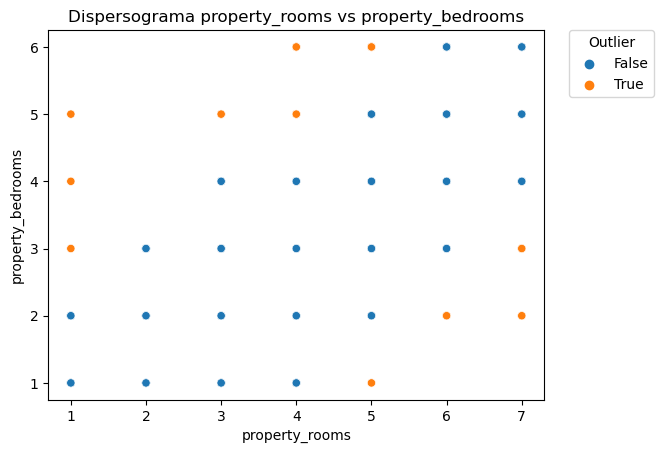

Los outliers para mahalanobis con un umbral de 35 son: 141. Constituyen el 0% de los datos


In [169]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot:ylabel='mahalanobis'>

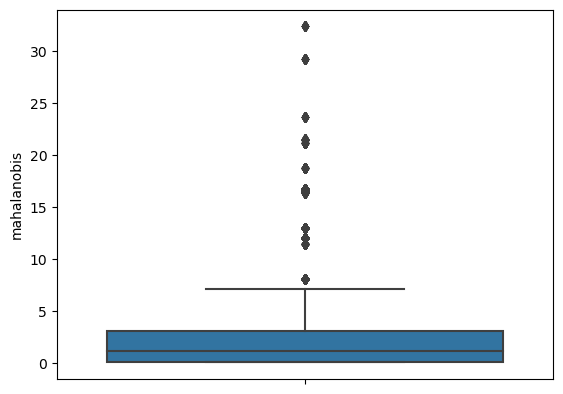

In [170]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [171]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
304227             1.0                5.0   146.440052
193392             7.0                3.0    37.103072
329904             7.0                3.0    37.103072
243503             7.0                3.0    37.103072
327377             7.0                3.0    37.103072
...                ...                ...          ...
428097             4.0                5.0    39.520191
304998             7.0                3.0    37.103072
350780             7.0                3.0    37.103072
369838             7.0                3.0    37.103072
70219              6.0                2.0    41.281218

[141 rows x 3 columns]

In [172]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 141 registros en train
Se han eliminado: 41 registros en test


Dispersograma sin los outliers mencionados


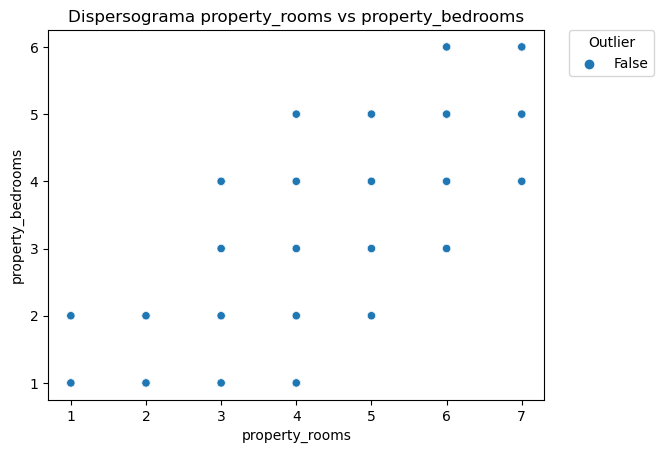

In [173]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

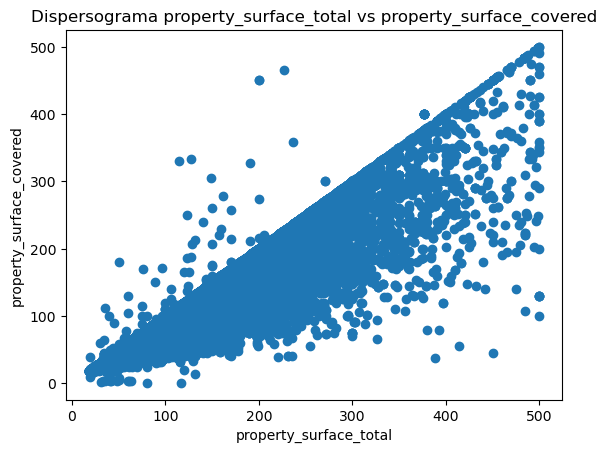

In [174]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [175]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
150679                   192.0                     170.0     3.006107
259023                    83.0                      83.0     0.341305
95258                    150.0                     105.0     2.304616
108662                   122.0                      75.0     2.807758
145714                    50.0                      50.0     0.327682

<AxesSubplot:ylabel='mahalanobis'>

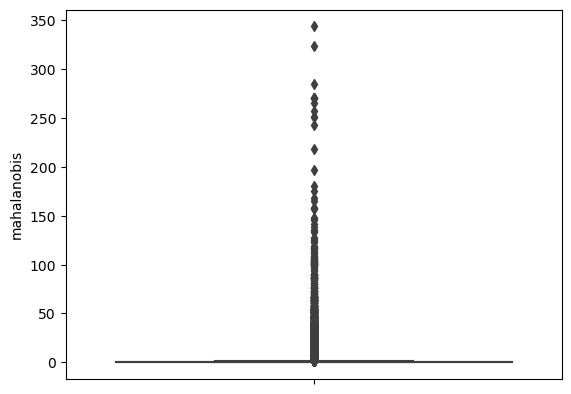

In [176]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [177]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [178]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
52468                    450.0                      45.0   343.905578
450430                   442.0                     140.0   175.491180
52066                    380.0                      80.0   180.710350
97055                    500.0                     130.0   270.668575
104592                   200.0                     450.0   250.871637
310407                   388.0                      38.0   256.838777
394706                   227.0                     466.0   242.992312
97083                    500.0                     130.0   270.668575
412681                   393.0                      80.0   197.372243
445383                   500.0                     130.0   270.668575
138208                   500.0                     100.0   323.882040
32735                    485.0                     108.0   285.064263
121279                   500.0                     130.0   270.668575
387598                   475.0                     140.0   218.455715
104359                   200.0                     450.0   250.871637
393711                   414.0                      56.0   265.252823

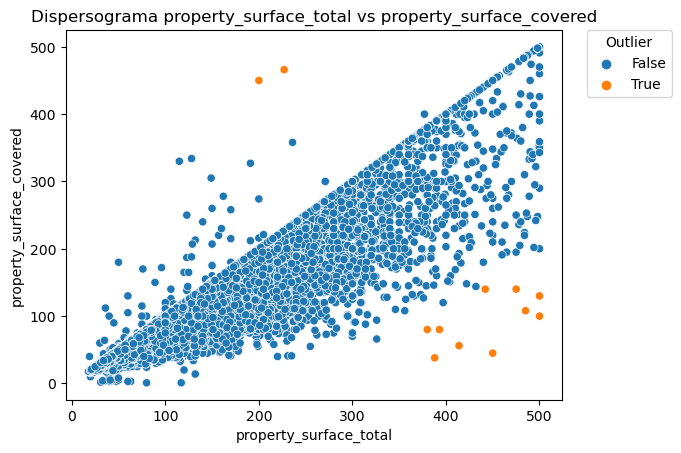

In [179]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [180]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 16 registros en train
Se han eliminado: 0 registros en test


Dispersograma sin los outliers mencionados


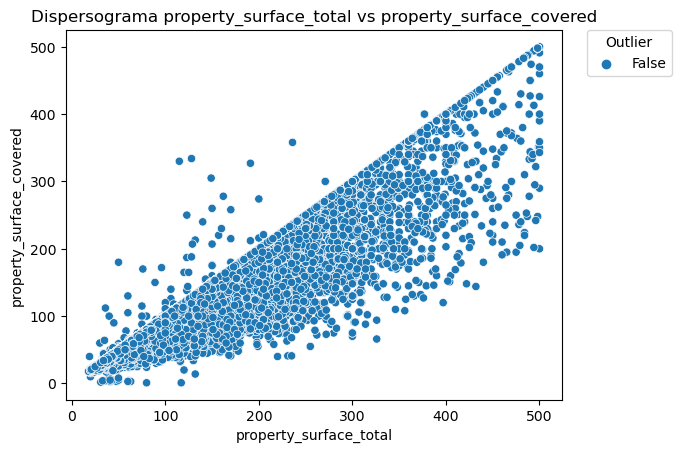

In [181]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [182]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [183]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 1.0004848473129775


latitud   longitud  mahalanobis
336481 -34.664447 -58.475718     4.037388
265687 -34.642098 -58.409051     1.054509
36523  -34.644718 -58.415658     1.278551
333808 -34.542768 -58.468530     1.414419
312675 -34.634739 -58.479813     1.618420
...           ...        ...          ...
133189 -34.624168 -58.491211     1.166459
19514  -34.548013 -58.465098     1.153538
222321 -34.628523 -58.472493     1.132114
11149  -34.638683 -58.508927     2.466020
221169 -34.639000 -58.504607     2.398650

[9350 rows x 3 columns]

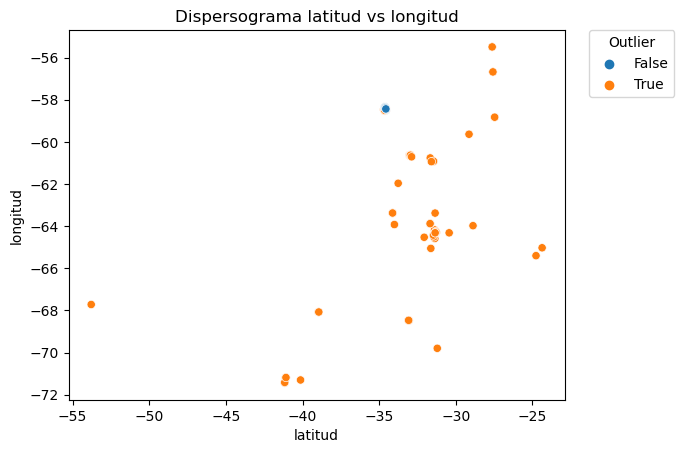

El grafico muestra 9350 outliers
El mínimo según el umbral es de: 1.0004848473129775


In [184]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


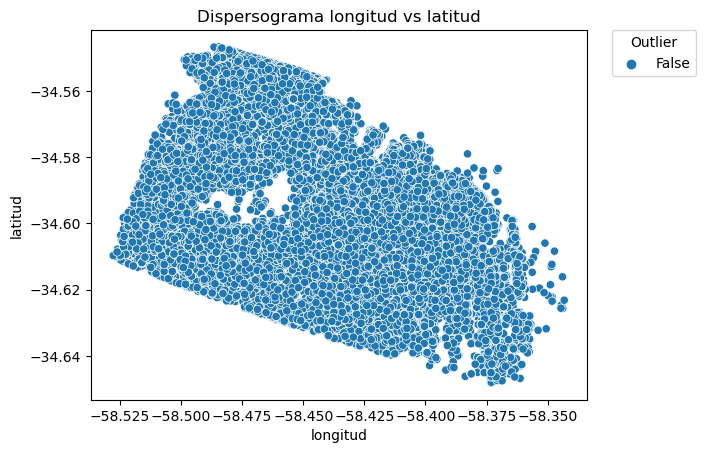

In [185]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [186]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 9350 registros en train
Se han eliminado: 5189 registros en test


In [187]:
ds_train.place_l3.isna().sum()

32

In [188]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [189]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    63819.000000
mean         2.132097
std         54.581673
min          0.000014
25%          0.182879
50%          0.400698
75%          0.694349
max      13405.304095
Name: mahalanobis, dtype: float64

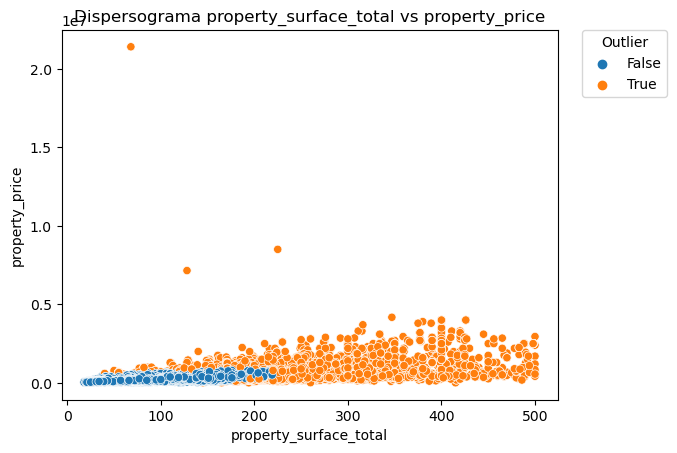

El grafico muestra 4040 outliers
El mínimo según el umbral es de: 5.0019190716279915
Los outliers representan un 6.330403171469312%


In [190]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot:ylabel='mahalanobis'>

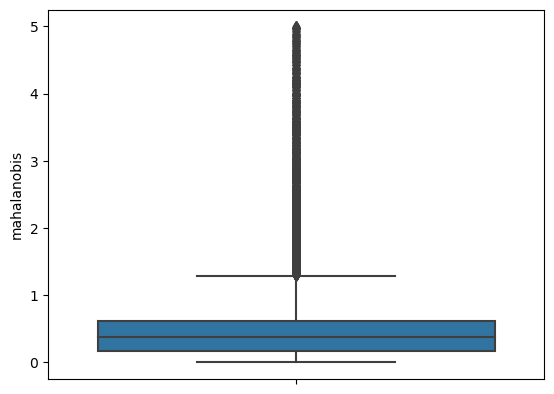

In [191]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

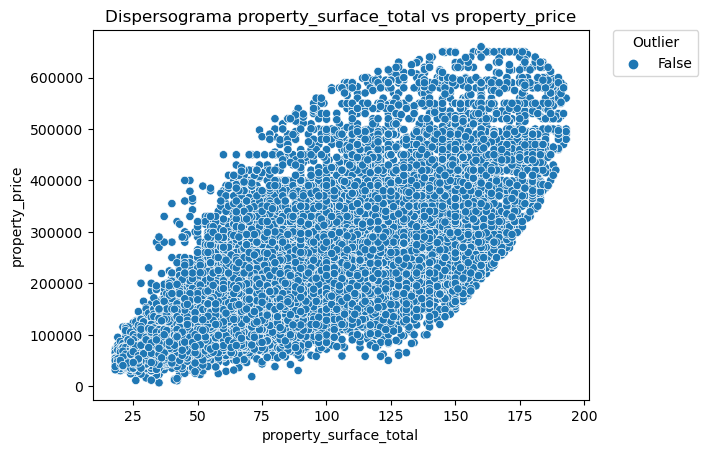

In [192]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [193]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 63819
outliers encontrados para los price_m2: 3114
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4276.7228413478415, limite inf: 439.6961653211649


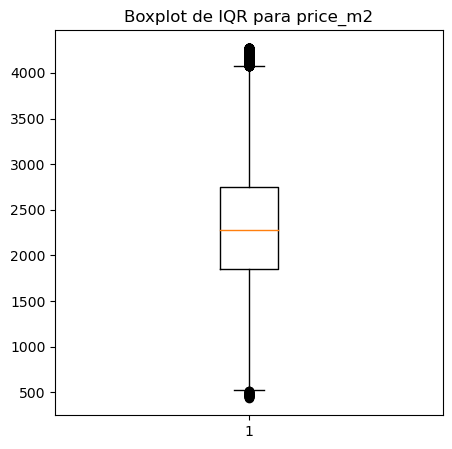

cantidad de datos del ds: 12502
outliers encontrados para los price_m2: 513
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4111.615287582024, limite inf: 523.1943788526548


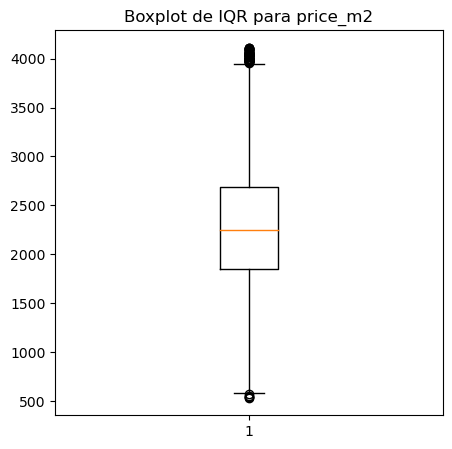

In [194]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3077 registros en train por encima del límite superior en train (4.821448158072047)
Hay 37 registros en train por debajo del límite inferior en train  (0.05797646468919914)
Hay 429 registros en train por encima del límite superior en train (0.6722136040990927)%
Hay 7 registros en train por debajo del límite inferior en train  (0.010968520346605243%)


Text(0.5, 1.0, 'Distribución sin outliers')

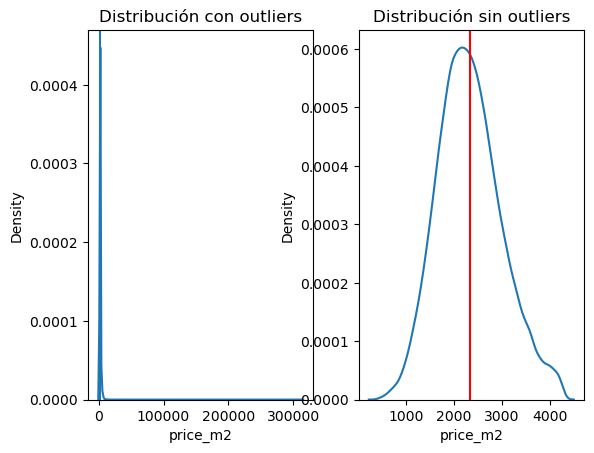

In [195]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [196]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3077 registros en train
Se han eliminado: 429 registros en test


In [197]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 37 registros en train
Se han eliminado: 7 registros en test


#### LOF

In [198]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [199]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [200]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

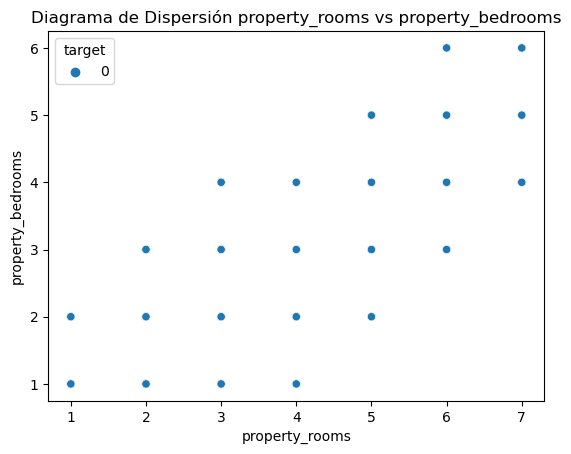

In [201]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [202]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
259023  Qgy7pmJ4NulNrdbxa8a7MQ==  2021-12-13  2021-12-23 -34.555436   
95258   QO1fBv/XWsHIqP59T0Xngg==  2021-09-24  2022-03-09 -34.577124   
108662  9yo77b8vzfYAXyFJHVhLiw==  2021-07-16  9999-12-31 -34.639306   
145714  HEyW45D+cF+tLUGaQPDgXg==  2021-08-30  2022-01-27 -34.563572   
...                          ...         ...         ...        ...   
27529   FqAojPMOPsXQP4pQZ/Ux7A==  2021-12-03  2021-12-16 -34.586508   
10977   jKN9+aupteXwnX5p5LBoDw==  2021-01-13  9999-12-31 -34.566244   
299911  sEwvJzkww2kSHWUjqZmijg==  2021-01-18  2021-10-08 -34.590336   
120071  f8UNoDzK5vWlZMLw62RPig==  2021-05-13  2021-05-18 -34.565196   
85753   R4NxUaNllh5sLTjCuHyRsQ==  2021-03-26  2021-06-05 -34.565532   

         longitud       place_l3 property_type  property_rooms  \
150679 -58.389144       Recoleta  Departamento             4.0   
259023 -58.475303          Nuñez  Departamento             3.0   
95258  -58.475892  Villa Urquiza          Casa             4.0   
108662 -58.368501       Barracas  Departamento             2.0   
145714 -58.439407        Palermo  Departamento             3.0   
...           ...            ...           ...             ...   
27529  -58.406691        Palermo  Departamento             1.0   
10977  -58.441729       Belgrano  Departamento             5.0   
299911 -58.403250       Recoleta  Departamento             1.0   
120071 -58.455010       Belgrano  Departamento             1.0   
85753  -58.438037       Belgrano  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
259023                2.0                    83.0                      83.0   
95258                 3.0                   150.0                     105.0   
108662                1.0                   122.0                      75.0   
145714                2.0                    50.0                      50.0   
...                   ...                     ...                       ...   
27529                 1.0                    25.0                      25.0   
10977                 4.0                   204.0                     195.0   
299911                1.0                    31.0                      31.0   
120071                1.0                    34.0                      34.0   
85753                 2.0                    85.0                      79.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
259023        100000.0                               Departamento - Nuñez   
95258         229000.0   Casa en venta 4Amb c/patio y terraza - Urquiza R   
108662        195000.0                            Departamento - Barracas   
145714        115000.0  Dpto. 3 ambientes, con cocina independiente y ...   
...                ...                                                ...   
27529          46000.0                             Departamento - Palermo   
10977         635000.0  VENTA. DEPTO 5 AMBIENTES CON DEPENDENCIA EN BE...   
299911         75000.0  VENTA - RECOLETA - OPORTUNIDAD - APTO PROFESIONAL   
120071         89900.0     VENTA- DEPTO 2 AMBIENTES - APTO PROF- BELGRANO   
85753         164000.0                 IMPRENTA 95m 2 DORMITORIOS 2 BAÑOS   

        target  scores  
150679       0    -1.0  
259023       0    -1.0  
95258        0    -1.0  
108662       0    -1.0  
145714       0    -1.0  
...        ...     ...  
27529        0    -1.0  
10977        0    -1.0  
299911       0    -1.0  
120071       0    -1.0  
85753        0    -1.0  

[60705 rows x 15 columns]

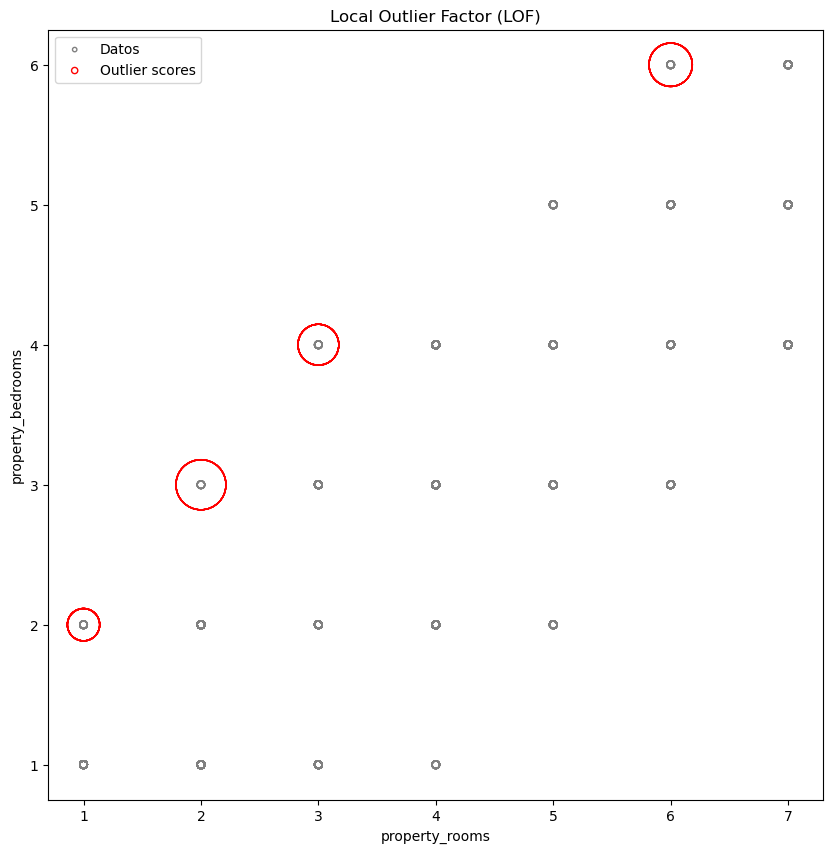

In [203]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

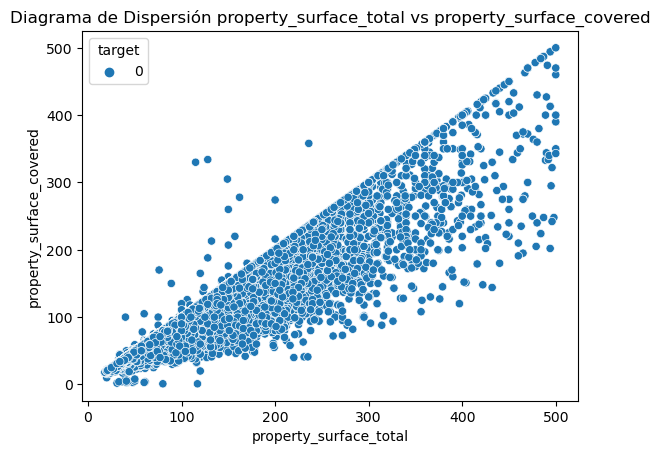

In [204]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [205]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id  start_date    end_date    latitud  \
150679  1PYAQFsAktkYlJpcdrH9uQ==  2021-03-24  2021-05-26 -34.589481   
259023  Qgy7pmJ4NulNrdbxa8a7MQ==  2021-12-13  2021-12-23 -34.555436   
95258   QO1fBv/XWsHIqP59T0Xngg==  2021-09-24  2022-03-09 -34.577124   
108662  9yo77b8vzfYAXyFJHVhLiw==  2021-07-16  9999-12-31 -34.639306   
145714  HEyW45D+cF+tLUGaQPDgXg==  2021-08-30  2022-01-27 -34.563572   
...                          ...         ...         ...        ...   
27529   FqAojPMOPsXQP4pQZ/Ux7A==  2021-12-03  2021-12-16 -34.586508   
10977   jKN9+aupteXwnX5p5LBoDw==  2021-01-13  9999-12-31 -34.566244   
299911  sEwvJzkww2kSHWUjqZmijg==  2021-01-18  2021-10-08 -34.590336   
120071  f8UNoDzK5vWlZMLw62RPig==  2021-05-13  2021-05-18 -34.565196   
85753   R4NxUaNllh5sLTjCuHyRsQ==  2021-03-26  2021-06-05 -34.565532   

         longitud       place_l3 property_type  property_rooms  \
150679 -58.389144       Recoleta  Departamento             4.0   
259023 -58.475303          Nuñez  Departamento             3.0   
95258  -58.475892  Villa Urquiza          Casa             4.0   
108662 -58.368501       Barracas  Departamento             2.0   
145714 -58.439407        Palermo  Departamento             3.0   
...           ...            ...           ...             ...   
27529  -58.406691        Palermo  Departamento             1.0   
10977  -58.441729       Belgrano  Departamento             5.0   
299911 -58.403250       Recoleta  Departamento             1.0   
120071 -58.455010       Belgrano  Departamento             1.0   
85753  -58.438037       Belgrano  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
150679                3.0                   192.0                     170.0   
259023                2.0                    83.0                      83.0   
95258                 3.0                   150.0                     105.0   
108662                1.0                   122.0                      75.0   
145714                2.0                    50.0                      50.0   
...                   ...                     ...                       ...   
27529                 1.0                    25.0                      25.0   
10977                 4.0                   204.0                     195.0   
299911                1.0                    31.0                      31.0   
120071                1.0                    34.0                      34.0   
85753                 2.0                    85.0                      79.0   

        property_price                                     property_title  \
150679        580000.0  Balcón terraza y totalmente reciclado en Recol...   
259023        100000.0                               Departamento - Nuñez   
95258         229000.0   Casa en venta 4Amb c/patio y terraza - Urquiza R   
108662        195000.0                            Departamento - Barracas   
145714        115000.0  Dpto. 3 ambientes, con cocina independiente y ...   
...                ...                                                ...   
27529          46000.0                             Departamento - Palermo   
10977         635000.0  VENTA. DEPTO 5 AMBIENTES CON DEPENDENCIA EN BE...   
299911         75000.0  VENTA - RECOLETA - OPORTUNIDAD - APTO PROFESIONAL   
120071         89900.0     VENTA- DEPTO 2 AMBIENTES - APTO PROF- BELGRANO   
85753         164000.0                 IMPRENTA 95m 2 DORMITORIOS 2 BAÑOS   

        target        scores  
150679       0 -1.012933e+00  
259023       0 -1.000000e+00  
95258        0 -9.978835e-01  
108662       0 -9.736413e-01  
145714       0 -1.000000e+00  
...        ...           ...  
27529        0 -1.000000e+00  
10977        0 -1.227839e+00  
299911       0 -1.000000e+00  
120071       0 -1.000000e+00  
85753        0 -2.500000e+09  

[60705 rows x 15 columns]

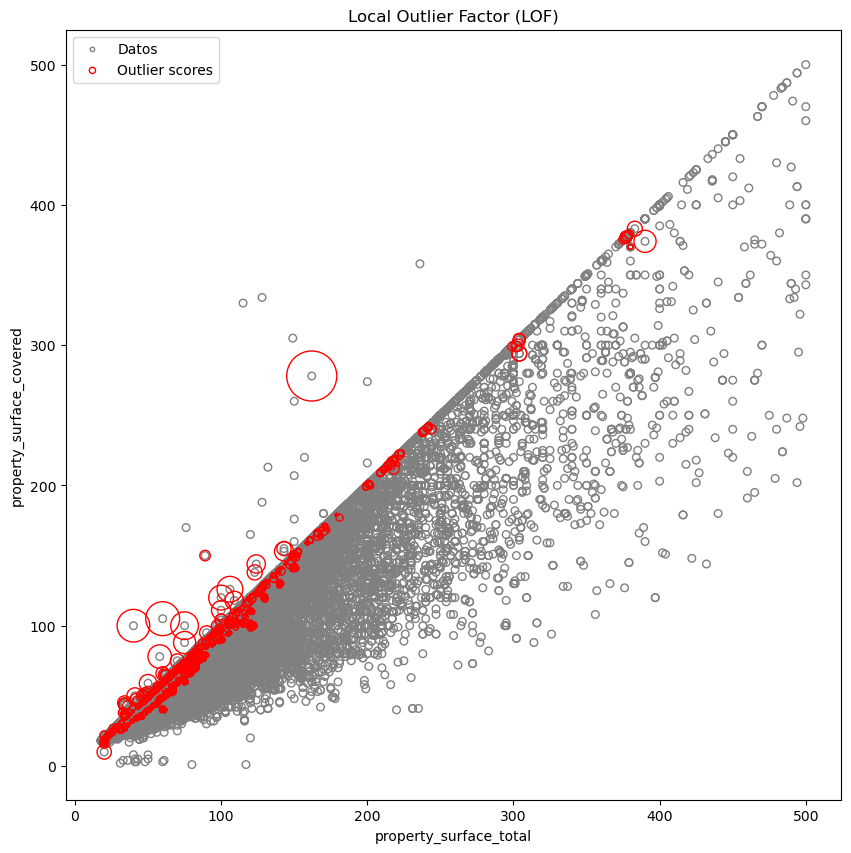

In [206]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [207]:
# Train con ID
ds_train_id = ds_train.copy()

# Test con ID
ds_test_id = ds_test.copy()


# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [208]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
150679 -34.589481 -58.389144             4.0                3.0   
259023 -34.555436 -58.475303             3.0                2.0   
95258  -34.577124 -58.475892             4.0                3.0   
108662 -34.639306 -58.368501             2.0                1.0   
145714 -34.563572 -58.439407             3.0                2.0   
...           ...        ...             ...                ...   
27529  -34.586508 -58.406691             1.0                1.0   
10977  -34.566244 -58.441729             5.0                4.0   
299911 -34.590336 -58.403250             1.0                1.0   
120071 -34.565196 -58.455010             1.0                1.0   
85753  -34.565532 -58.438037             3.0                2.0   

        property_surface_total  property_surface_covered  
150679                   192.0                     170.0  
259023                    83.0                      83.0  
95258                    150.0                     105.0  
108662                   122.0                      75.0  
145714                    50.0                      50.0  
...                        ...                       ...  
27529                     25.0                      25.0  
10977                    204.0                     195.0  
299911                    31.0                      31.0  
120071                    34.0                      34.0  
85753                     85.0                      79.0  

[60705 rows x 6 columns]

In [209]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.209603  1.281597        1.057934           1.261277   
1      1.799740 -1.154872        0.244401           0.190846   
2      0.786768 -1.171526        1.057934           1.261277   
3     -2.117575  1.865362       -0.569131          -0.879586   
4      1.419759 -0.139790        0.244401           0.190846   
...         ...       ...             ...                ...   
60700  0.348463  0.785395       -1.382664          -0.879586   
60701  1.294962 -0.205443        1.871466           2.331708   
60702  0.169701  0.882693       -1.382664          -0.879586   
60703  1.343920 -0.581022       -1.382664          -0.879586   
60704  1.328222 -0.101045        0.244401           0.190846   

       property_surface_total  property_surface_covered  
0                    1.866464                  1.995812  
1                    0.038388                  0.251851  
2                    1.162068                  0.692853  
3                    0.692470                  0.091487  
4                   -0.515066                 -0.409651  
...                       ...                       ...  
60700               -0.934349                 -0.910789  
60701                2.067720                  2.496950  
60702               -0.833721                 -0.790516  
60703               -0.783407                 -0.730379  
60704                0.071931                  0.171669  

[60705 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [210]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
330844 -34.577306 -58.434056             3.0                2.0   
309361 -34.558066 -58.473512             6.0                5.0   
140219 -34.545531 -58.474900             1.0                1.0   
296956 -34.605870 -58.457702             3.0                2.0   
406227 -34.587415 -58.438877             2.0                1.0   
...           ...        ...             ...                ...   
447609 -34.562450 -58.454040             3.0                2.0   
411688 -34.598424 -58.440173             4.0                3.0   
300668 -34.639597 -58.369096             2.0                1.0   
55627  -34.574611 -58.492324             2.0                1.0   
316256 -34.583990 -58.419339             2.0                1.0   

        property_surface_total  property_surface_covered  
330844                    68.0                      68.0  
309361                   341.0                     206.0  
140219                    20.0                      20.0  
296956                    60.0                      52.0  
406227                    99.0                      58.0  
...                        ...                       ...  
447609                    76.0                      70.0  
411688                   136.0                     123.0  
300668                   105.0                      92.0  
55627                     67.0                      59.0  
316256                    44.0                      44.0  

[12066 rows x 6 columns]

In [211]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.634738 -0.019544        0.313599           0.242165   
1      1.495119 -1.231622        2.806281           3.500861   
2      2.055655 -1.274252       -1.348188          -0.844067   
3     -0.642587 -0.745941        0.313599           0.242165   
4      0.182694 -0.167630       -0.517295          -0.844067   
...         ...       ...             ...                ...   
12061  1.299075 -0.633432        0.313599           0.242165   
12062 -0.309614 -0.207450        1.144493           1.328397   
12063 -2.150794  1.976029       -0.517295          -0.844067   
12064  0.755280 -1.809540       -0.517295          -0.844067   
12065  0.335868  0.432559       -0.517295          -0.844067   

       property_surface_total  property_surface_covered  
0                   -0.153842                  0.038938  
1                    4.854149                  3.142344  
2                   -1.034368                 -1.040507  
3                   -0.300596                 -0.320877  
4                    0.414831                 -0.185946  
...                       ...                       ...  
12061               -0.007088                  0.083915  
12062                1.093570                  1.275803  
12063                0.524897                  0.578661  
12064               -0.172186                 -0.163458  
12065               -0.594105                 -0.500785  

[12066 rows x 6 columns]

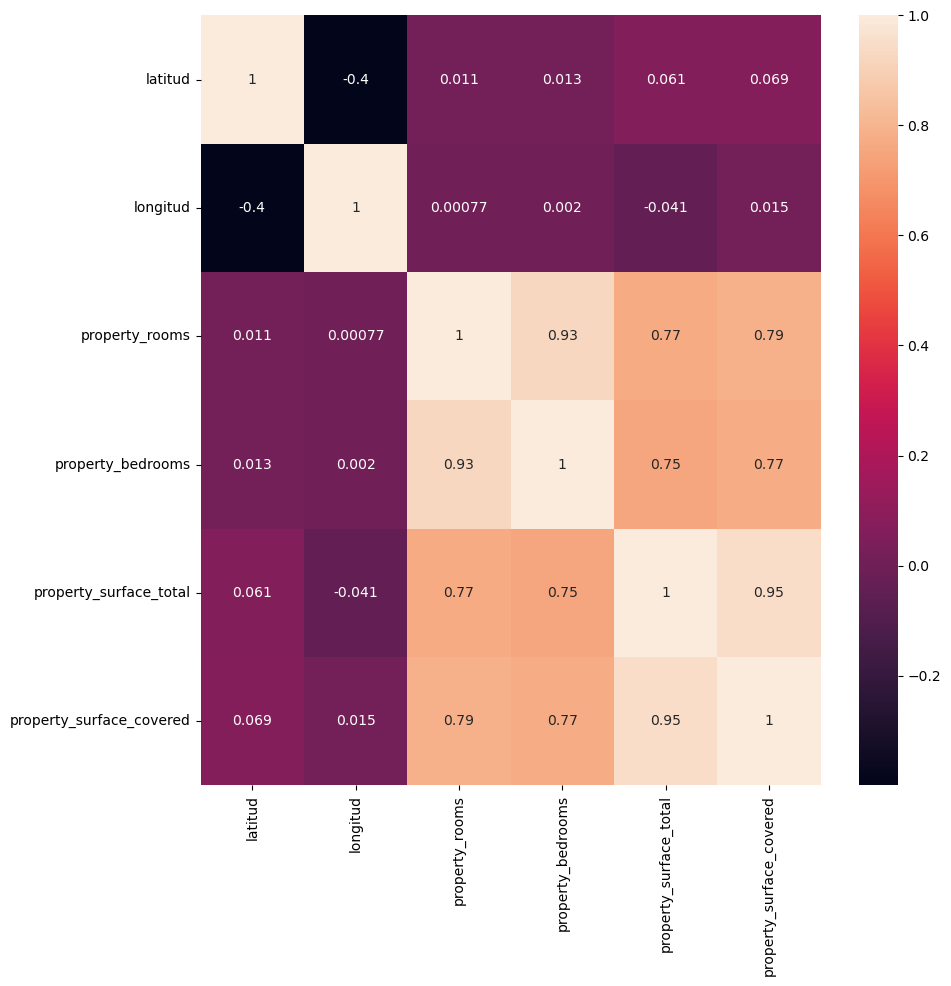

In [212]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [213]:
ds_reducido_normalizado.shape

(60705, 6)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0      3.085994  0.816242 -1.097790  0.662103  0.169128  0.041076
1      0.433470 -2.067987 -0.435171 -0.234339 -0.046044  0.151578
2      2.120547 -1.314545  0.357121 -0.250354  0.146533 -0.309088
3     -0.417134  2.740580  0.042219  1.289799 -0.178493 -0.408855
4     -0.198761 -1.073894 -0.814840 -0.838897 -0.063220  0.007346
...         ...       ...       ...       ...       ...       ...
60700 -2.048850  0.237383 -0.857021  0.112893  0.353101 -0.014160
60701  4.426907 -0.928815 -0.724577  0.008507  0.333061  0.269054
60702 -1.944819  0.430565 -0.813521  0.237854  0.356736  0.004609
60703 -1.836381 -1.432466 -0.608565  0.227588  0.356054  0.056043
60704  0.383841 -0.992019 -0.841143 -0.251708 -0.045351  0.028494

[60705 rows x 6 columns]

In [215]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.23
0.1
0.07
0.01
0.01


In [216]:
varianza_explicada.cumsum()

array([0.58017763, 0.81357563, 0.91437822, 0.97954851, 0.99163572,
       1.        ])

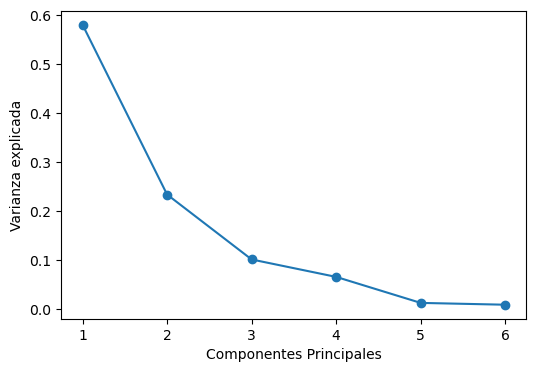

In [217]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

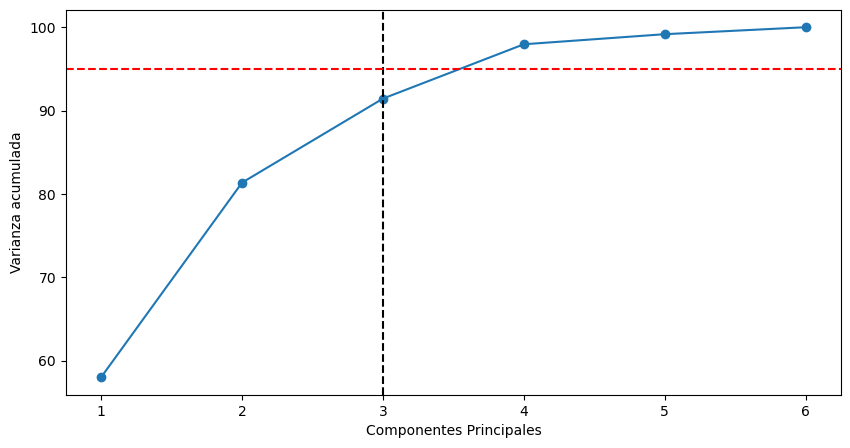

In [218]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [219]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0  3.085994  0.816242 -1.097790
1  0.433470 -2.067987 -0.435171
2  2.120547 -1.314545  0.357121
3 -0.417134  2.740580  0.042219
4 -0.198761 -1.073894 -0.814840

### Clasificación

#### Tercera variable (25-50-25 por tipo de propiedad)

In [220]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
ds_train['pxm2'] = pxm2

##### Casas

In [221]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

In [222]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### Departamentos

In [223]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### PH

In [224]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### Union de las 3 al dataset

In [225]:
nueva_categoria = pd.concat([casas, dptos, phs])
ds_train['tipo_precio'] = nueva_categoria['tipo_precio']

#### Construccion de la variable en Test

In [226]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [227]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [228]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

### Exportamos datasets

In [229]:
ds_test = ds_test.drop(['start_date', 'end_date'], axis=1)

In [230]:
ds_train.to_csv('datasets/tp1-train.csv')
ds_test.to_csv('datasets/tp1-test.csv')


ds_train_id.to_csv('datasets/tp1-train_id.csv')
ds_test_id.to_csv('datasets/tp1-test_id.csv')